<a href="https://colab.research.google.com/github/praxyfarhana/World_hapinness_report_EDA/blob/main/World_Happiness_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing libraries

# Data Manipulation
import pandas as pd
import numpy as np

# Unzipping and interacting with operating system
from zipfile import ZipFile
import os

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Display setting
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette='pastel')

# **Introduction**

**The goal of analyzing World Happiness Report project aims to explore and understand the factors that influence the overall happiness of countries accross different regions around the world. Happiness is a complex measure that goes beyond economic wealth, encompassing social support, health, personal freedom, generosity, and perceptions of corruption. This analysis seeks to identify which factors are most strongly associated with happiness, highlight regional differences, and uncover patterns or trends that may provide insights into improving well-being. Through data exploration, visualization, and storytelling, we aim to turn the dataset into actionable insights that explain why some countries consistently rank higher in happiness than others.**

# **Data Ingestion**

In [ ]:
# Unzipping the file

# Path to the zip file
wh_zip = "/content/drive/MyDrive/ds_projects/archive.zip"

# Extract all contents
with ZipFile(wh_zip, 'r') as zip:
  zip.extractall()

print("Files extracted successfully!")

Files extracted successfully!


In [ ]:
# List the contents extracted
os.listdir()

['.config',
 '2018.csv',
 'drive',
 '2017.csv',
 '2015.csv',
 '2019.csv',
 '2016.csv',
 'sample_data']

In [ ]:
# Extract and list CSV files found in the contents

csv_files=[f for f in os.listdir() if f.endswith('.csv')]
print("CSV files found:", csv_files)

CSV files found: ['2018.csv', '2017.csv', '2015.csv', '2019.csv', '2016.csv']


In [ ]:
# Reading each CSV file and storing it in a dictionary
wh_data = {}
for file in csv_files:
  wh_data[file.split('.')[0]] = pd.read_csv(file)

In [ ]:
for year, df in wh_data.items():
    print(f"Year: {year} → Shape: {df.shape}")


Year: 2018 → Shape: (156, 9)
Year: 2017 → Shape: (155, 12)
Year: 2015 → Shape: (158, 12)
Year: 2019 → Shape: (156, 9)
Year: 2016 → Shape: (157, 13)


In [ ]:
wh_data['2015'] = pd.read_csv('2015.csv')
wh_data['2016'] = pd.read_csv('2016.csv')
wh_data['2017'] = pd.read_csv('2017.csv')
wh_data['2018'] = pd.read_csv('2018.csv')
wh_data['2019'] = pd.read_csv('2019.csv')

# **Datasets Overview**





**The World Happiness Report on Kaggle provides related datasets that offer a comprehensive view of global happiness scores, ranging from the years 2015 to 2019, which I have renamed as wh_data['2015'] to wh_data['2019'] in my analysis. The variable names across the datasets are mostly the same, with slight variations in naming in some years. In addition, the 2016–2017 datasets include four additional unique variables.
Below are Variables Explained:**

**Variable Descriptions after standardization**

1. country — The name of the country included in the report.

2. region — The geographical region or continent the country belongs to (e.g., Western Europe, Sub-Saharan Africa).

3. happiness_rank — The overall ranking of the country based on its happiness score, with 1 being the happiest.

4. happiness_score — The average score representing the overall happiness or well-being of a country, typically derived from survey responses.

5. standard_error — The margin of error or uncertainty associated with the reported happiness score.

6. gdp — The GDP per capita value, representing the economic prosperity of a country and how much income is available per person.

7. social_support — A measure of social relationships and community support, indicating how much people feel they can rely on others.

8. life_expectancy — The average healthy life expectancy in the country, representing the general health and longevity of its population.

9. freedom — A measure of the degree to which individuals feel free to make their own life choices.

10. corruption — The perceived level of corruption in government and business, where higher values indicate lower trust in institutions.

11. generosity — A measure of charitable behavior, based on how willing people are to donate or help others.

12. dystopia_residual — The part of the happiness score not explained by the listed factors. It represents the hypothetical baseline (dystopia) from which all countries improve, capturing unexplained variance.

13. lower_confidence_interval — The lower bound of the 95% confidence interval for the happiness score, showing the minimum likely score.

14. upper_confidence_interval — The upper bound of the 95% confidence interval for the happiness score, showing the maximum likely score.

15. Whisker.high — The upper value used in visual box-plot style calculations for score variation.

16. Whisker.low — The lower value used in visual box-plot style calculations for score variation.




# **Datasets variable Names Transformation**

1. **Function: convert any DataFrame's column names to snake_case**




In [ ]:
def to_snake_case(df):
    df = df.copy()
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(r"[^\w]+", "_", regex=True)  # replace one or more non-word chars with underscore
        .str.replace(r"_+", "_", regex=True)      # collapse multiple underscores
        .str.strip("_")                            # remove leading/trailing underscores
    )
    return df


2. **column mapping dictionary to standardize names**

In [ ]:
column_map = {
    # GDP / Economy variations
    "Economy (GDP per Capita)": "gdp",                   # 2015, 2016
    "Economy..GDP.per.Capita.": "gdp",                   # 2017 version with dots
    "GDP per capita": "gdp",                             # 2018, 2019

    # Social Support variations
    "Family": "social_support",                          # 2015–2017
    "Social support": "social_support",                  # 2018, 2019

    # Life Expectancy variations
    "Health (Life Expectancy)": "life_expectancy",       # 2015, 2016
    "Health..Life.Expectancy.": "life_expectancy",       # 2017
    "Healthy life expectancy": "life_expectancy",        # 2018, 2019

    # Freedom variations
    "Freedom": "freedom",                                # 2015–2017
    "Freedom to make life choices": "freedom",           # 2018, 2019

    # Corruption variations
    "Trust (Government Corruption)": "corruption",       # 2015, 2016
    "Trust..Government.Corruption.": "corruption",       # 2017
    "Perceptions of corruption": "corruption",           # 2018, 2019

    # Generosity
    "Generosity": "generosity",

    # Happiness Score variations
    "Happiness Score": "happiness_score",                # 2015–2016
    "Happiness.Score": "happiness_score",                # 2017
    "Score": "happiness_score",                          # 2018–2019

    # Happiness Rank variations
    "Happiness Rank": "happiness_rank",                  # 2015–2016
    "Happiness.Rank": "happiness_rank",                  # 2017
    "Overall rank": "happiness_rank",                    # 2018–2019

    # Country variations
    "Country": "country",                                # 2015–2017
    "Country or region": "country",                      # 2018–2019

    # Region variations
    "Region": "region",                                  # 2015–2016
    "Regional indicator": "region",                      # 2018–2019

    # Confidence intervals (2015–2016)
    "Lower Confidence Interval": "lower_ci",
    "Upper Confidence Interval": "upper_ci",

    # Whiskers (2017 only)
    "Whisker.high": "whisker_high",
    "Whisker.low": "whisker_low",

    # Dystopia Residual
    "Dystopia Residual": "dystopia_residual",
    "Dystopia.Residual": "dystopia_residual",           # 2017
}


3. **Converting the column_map dictionary to a snake_case**

In [ ]:
def map_keys_to_snake(column_map):
    new_map = {}
    for k, v in column_map.items():
        k_snake = (
            k.strip()
            .lower()
            .replace(" ", "_")
        )
        # Apply same regex transformation as dataframe columns
        k_snake = (
            k_snake
            .replace("(", "_").replace(")", "_")
            .replace(".", "_")
        )
        k_snake = "_".join(filter(None, k_snake.split("_")))  # collapse duplicates
        new_map[k_snake] = v
    return new_map

column_map_snake = map_keys_to_snake(column_map)



4. **Store datasets in a dictionary for easy looping**

In [ ]:
wh_data = {
    '2015': wh_data['2015'],
    '2016': wh_data['2016'],
    '2017': wh_data['2017'],
    '2018': wh_data['2018'],
    '2019': wh_data['2019']
}

In [ ]:
# 4. Apply standardization to all datasets
standardized_data = {}

for year, df in wh_data.items():
    df = to_snake_case(df)

    df = df.rename(columns={col: column_map_snake[col]
                            for col in df.columns
                            if col in column_map_snake})

    standardized_data[year] = df

wh_data = standardized_data
print("All datasets standardized successfully!")



All datasets standardized successfully!


5. **Apply snake_case + mapping to ALL datasets**

In [ ]:
for year, df in wh_data.items():
    print(f"{year} columns: {df.columns.tolist()}")


2015 columns: ['country', 'region', 'happiness_rank', 'happiness_score', 'standard_error', 'gdp', 'social_support', 'life_expectancy', 'freedom', 'corruption', 'generosity', 'dystopia_residual']
2016 columns: ['country', 'region', 'happiness_rank', 'happiness_score', 'lower_ci', 'upper_ci', 'gdp', 'social_support', 'life_expectancy', 'freedom', 'corruption', 'generosity', 'dystopia_residual']
2017 columns: ['country', 'happiness_rank', 'happiness_score', 'whisker_high', 'whisker_low', 'gdp', 'social_support', 'life_expectancy', 'freedom', 'generosity', 'corruption', 'dystopia_residual']
2018 columns: ['happiness_rank', 'country', 'happiness_score', 'gdp', 'social_support', 'life_expectancy', 'freedom', 'generosity', 'corruption']
2019 columns: ['happiness_rank', 'country', 'happiness_score', 'gdp', 'social_support', 'life_expectancy', 'freedom', 'generosity', 'corruption']


**Renaming and Standardization of dataset variables:**

This step above is not strictly part of Exploratory Data Analysis (EDA), but it is a data preprocessing step that is essential before EDA, as it ensures that we can easily understand the datasets while comparing variables, plot data, and perform analyses without running into errors caused by inconsistent column names.

In the process I had to standardized the column names across multiple years of the World Happiness Report datasets to ensure consistency and facilitate analysis. First, I applied a to_snake_case function to convert all dataframe column names into lowercase, underscore-separated format, removing spaces and special characters. Then, I created a snake-case version of my column mapping dictionary, which maps all the various naming conventions across years (e.g., “Economy (GDP per Capita)” vs. “GDP per capita”) to consistent, unified names like gdp, social_support, and happiness_score. Finally, I applied this mapping to each dataframe, resulting in a set of standardized datasets where columns have uniform names across all years.

# **Dataset 2015**

# Basic Data Understanding









In [ ]:
wh_data['2015'].head()

,country,region,happiness_rank,happiness_score,standard_error,gdp,social_support,life_expectancy,freedom,corruption,generosity,dystopia_residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:
wh_data['2015'].tail()

,country,region,happiness_rank,happiness_score,standard_error,gdp,social_support,life_expectancy,freedom,corruption,generosity,dystopia_residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [ ]:
# Inspecting the dataset
wh_data['2015'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            158 non-null    object 
 1   region             158 non-null    object 
 2   happiness_rank     158 non-null    int64  
 3   happiness_score    158 non-null    float64
 4   standard_error     158 non-null    float64
 5   gdp                158 non-null    float64
 6   social_support     158 non-null    float64
 7   life_expectancy    158 non-null    float64
 8   freedom            158 non-null    float64
 9   corruption         158 non-null    float64
 10  generosity         158 non-null    float64
 11  dystopia_residual  158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [ ]:
# Displaying unique countries
wh_data['2015']['country'].nunique()

158

**2015**

The 2015 dataset contains 158 rows, each representing a country included in that year’s global ranking. For every country, the dataset provides a set of 12 columns, capturing different dimensions that contribute to overall happiness. These columns span across multiple data types, including categorical variables (like the country name and its world region) and numerical variables (such as GDP per capita, life expectancy, and generosity scores). Specifically, the dataset includes 2 object-type columns, 1 integer column, and 9 floating-point columns, indicating a strong emphasis on quantitative measures.

A closer look reveals that there are no missing values in this dataset, each of the 158 countries has complete information across all 12 features. This makes the dataset clean and analysis-ready, allowing for smooth exploratory data analysis and statistical modeling without the need for imputation or preprocessing to handle null entries.

After running to view unique values I found out that each row was a perfect unique country.

Overall, this dataset provides a rich and complete snapshot of the global happiness landscape in 2015, making it a strong foundation for comparing regions, analysing correlations, and understanding what contributes most to a nation's reported well-being.

**Checking for whole Column Validation**

**Object Columns**

In [ ]:
for col in wh_data['2015'].select_dtypes(include='object'):
    # Checking if any value looks numeric
    mask = wh_data['2015'][col].str.match(r'^\d+\.?\d*$', na=False)
    if mask.any():
        print(f"Column '{col}' has numeric-looking strings:\n", df.loc[mask, col].unique())


**Numerical Columns**

In [ ]:
# identify the numerical columns
wh_data_numeric = wh_data['2015'].select_dtypes(include='float64')
print(wh_data_numeric.columns)

Index(['happiness_score', 'standard_error', 'gdp', 'social_support',
       'life_expectancy', 'freedom', 'corruption', 'generosity',
       'dystopia_residual'],
      dtype='object')


In [ ]:
# Checking if the contain numeric values
for col in wh_data_numeric :
    unique_types = wh_data['2015'][col].apply(type).value_counts()
    if len(unique_types) > 1:
        print(f"Mixed types in '{col}':")
        print(unique_types)


**2015 Column validation results**

I headed further to check both the object and numeric columns to ensure they contained the correct types of values. I first scanned all object-type columns in the 2015 dataset to see whether any string entries actually looked like numbers, which can happen when numeric values are accidentally imported as text; this helped me detect potential formatting issues before running calculations. I then examined the columns expected to be numeric by checking whether they contained mixed data types, such as floats, integers, or stray strings, since inconsistencies like these could disrupt statistical analysis or visualizations. Together, these checks allowed me to validate the dataset’s structure and confirm that nothing was improperly typed. In the end, I found no numeric-looking strings in the object columns and no mixed data types in the numeric columns, meaning the dataset was clean and ready for analysis

In [ ]:
# Number of unique values in Happiness Rank
wh_data['2015']['happiness_rank'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158])

# **Descriptive Statistics**

In [ ]:
wh_data['2015'].describe()

,happiness_rank,happiness_score,standard_error,gdp,social_support,life_expectancy,freedom,corruption,generosity,dystopia_residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


**2015 Summary Statistics Explanation**

When I looked at 2015 dataset, I saw that the average happiness score was about a 5 out of 10. This average hid a huge gap, though, because the happiest country was far above the least happy one. I found that a country's wealth, measured by its GDP per capita, varied tremendously from the very poorest to the very richest, and this was a major source of global inequality.

However, I also noticed a more hopeful constant. The factor of social support—having people to rely on—was strong and consistent across most nations. Sadly, the perception of corruption was generally high for many, while the freedom to make life choices was only moderate for the average person. Ultimately, the data showed me that while money and health were important, the bonds between people and the integrity of their leaders were just as vital to a nation's happiness.

# **Checking for Distribution in numeric columns is 2015 dataset**

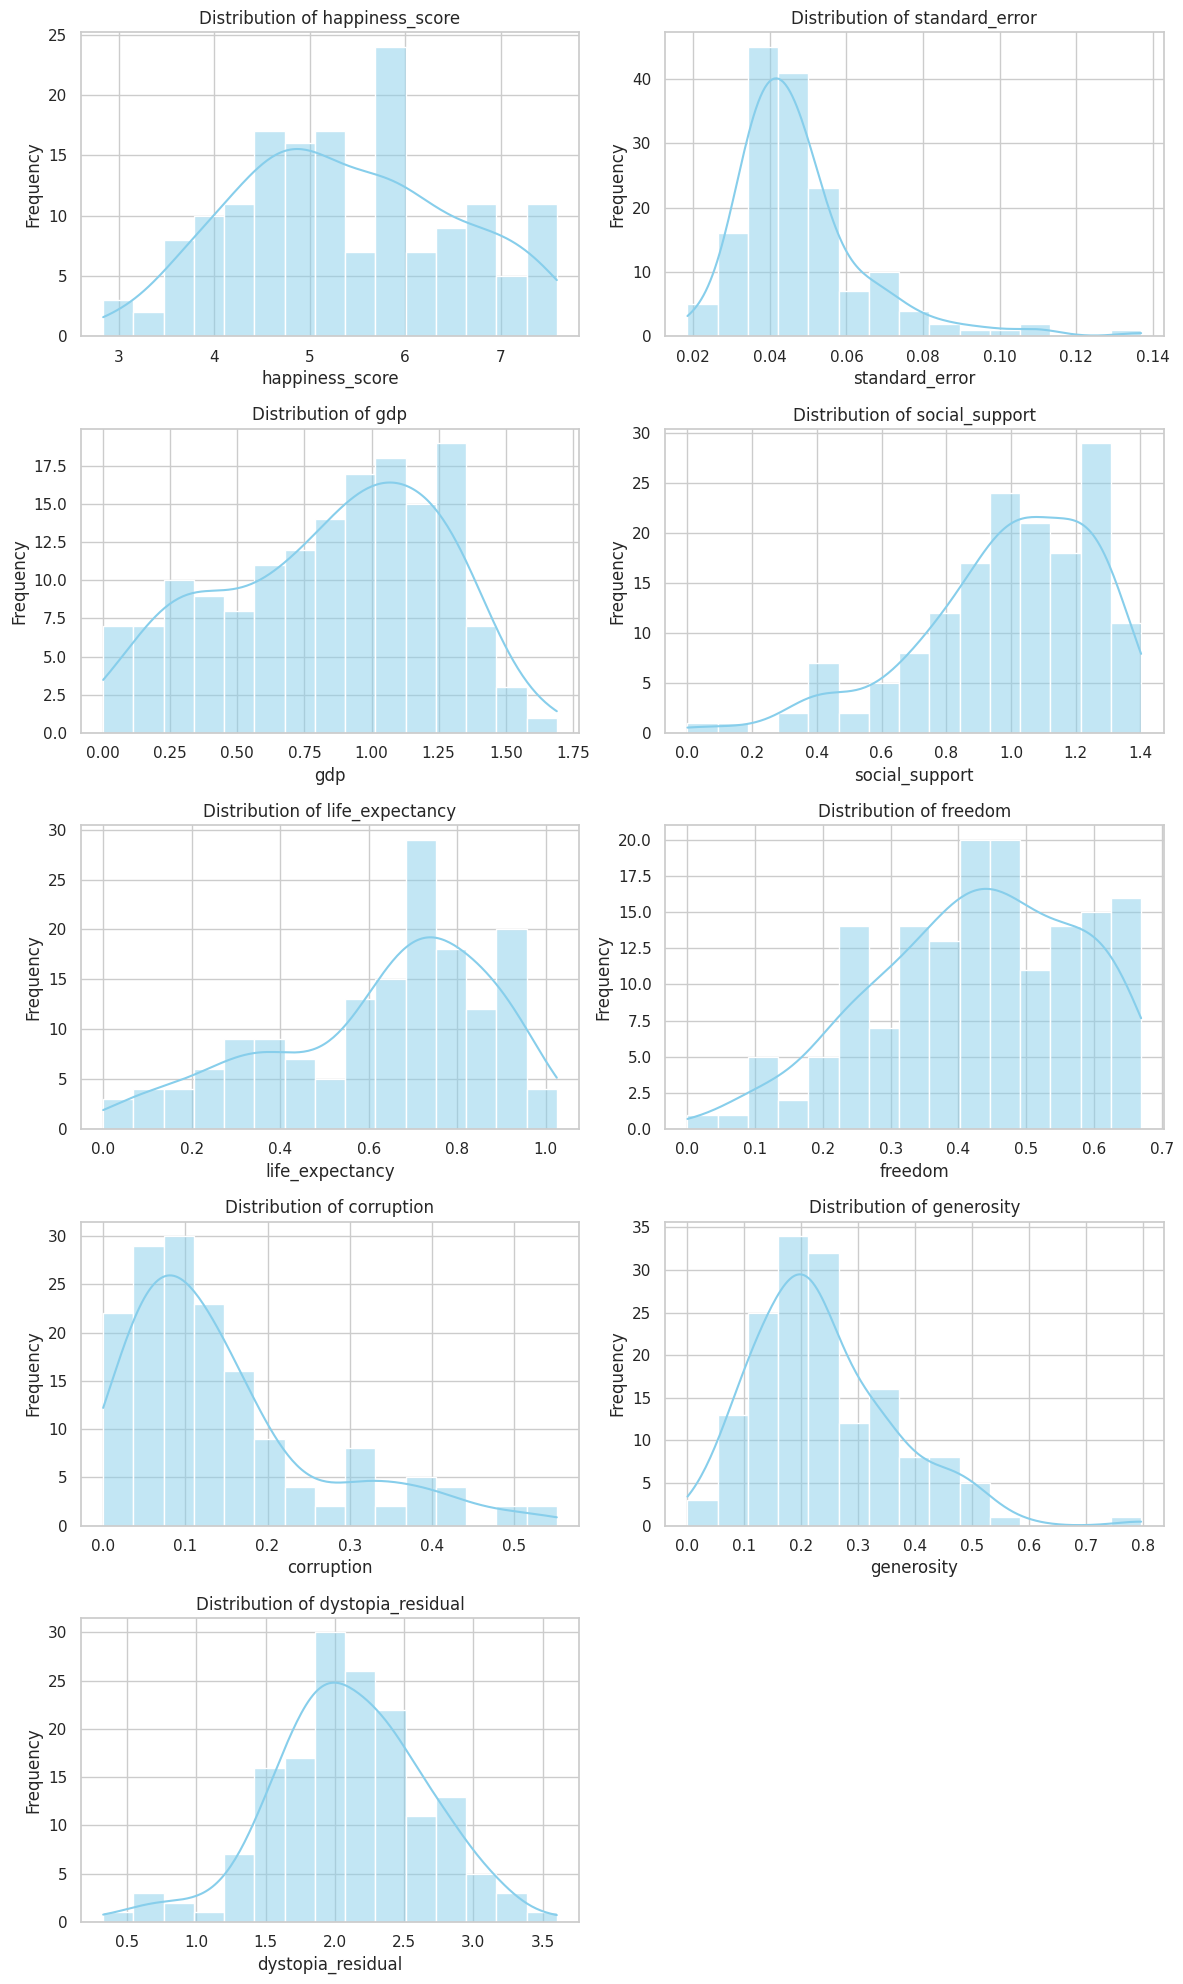

In [ ]:
# Re-identify the numerical columns to ensure correctness
wh_data_numeric = wh_data['2015'].select_dtypes(include='float64').columns

# Determine number of columns and rows for subplot grid
n_cols = 2  # number of plots per row
n_rows = (len(wh_data_numeric) + n_cols - 1) // n_cols  # calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()  # flatten in case of multiple rows

for i, col in enumerate(wh_data_numeric):
    sns.histplot(wh_data['2015'][col], kde=True, bins=15, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# 3. Optional: Check skewness and kurtosis for each column
for col in wh_data_numeric:
    skew = wh_data['2015'][col].skew()
    kurt = wh_data['2015'][col].kurt()
    print(f"{col}: Skewness = {skew:.2f}, Kurtosis = {kurt:.2f}")

happiness_score: Skewness = 0.10, Kurtosis = -0.78
standard_error: Skewness = 1.98, Kurtosis = 5.99
gdp: Skewness = -0.32, Kurtosis = -0.87
social_support: Skewness = -1.01, Kurtosis = 0.92
life_expectancy: Skewness = -0.71, Kurtosis = -0.39
freedom: Skewness = -0.41, Kurtosis = -0.46
corruption: Skewness = 1.39, Kurtosis = 1.38
generosity: Skewness = 1.00, Kurtosis = 1.75
dystopia_residual: Skewness = -0.24, Kurtosis = 0.53


**2015 Distribution Analysis**

Happiness Score

Distribution: Symmetric, bell-shaped histogram

Skewness: 0.10

Kurtosis: -0.78

Interpretation:
This variable is extremely close to a normal distribution. The near-zero skew indicates strong symmetry, while the slightly negative kurtosis (platykurtic) suggests a flatter peak and lighter tails than a perfect Gaussian. This is one of the most statistically model-friendly variables in the dataset.

GDP per Capita (gdp)

Distribution: Mild left-skew, slight flattening

Skewness: -0.32

Kurtosis: -0.87

Interpretation:
Contrary to expectations of a heavy right skew, the data shows a gentle left skew, implying a few unusually low-GDP countries slightly pull the mean downward. The negative kurtosis indicates a flatter distribution, possibly due to transformations or scaling in the source data.

Social Support

Distribution: Strong left-skew; most countries score high

Skewness: -1.01

Kurtosis: 0.92

Interpretation:
This heavily left-skewed and leptokurtic variable signals that most countries enjoy high social support, with a smaller set of outliers on the low end. The sharp peak and heavy left tail indicate concentration around high values with a minority of struggling nations.

Healthy Life Expectancy

Distribution: Mild left-skew

Skewness: -0.71

Kurtosis: -0.39

Interpretation:
The distribution reflects generally high life expectancies with a smaller number of countries falling behind. The negative kurtosis suggests a flatter distribution without strong clustering around the mean.

Freedom

Distribution: Nearly symmetric, slightly left-skewed

Skewness: -0.41

Kurtosis: -0.46

Interpretation:
Freedom levels vary widely across countries, with no dominant central value. The mild negative skew and flatness point to a diverse global landscape for perceived freedom.

Generosity

Distribution: Strong right skew

Skewness: 1.00

Kurtosis: 1.75

Interpretation:
Most countries exhibit very low generosity scores, producing a tall peak near zero and a long tail of a few exceptionally generous nations. This is a classic case of a highly non-normal variable that would benefit from log or root transformation before modeling.

Perception of Corruption

Distribution: Very strong right skew

Skewness: 1.39

Kurtosis: 1.38

Interpretation:
This variable is one of the most skewed in the dataset. Most countries report high perceived corruption, while only a small group are viewed as relatively clean. Its shape highlights global inequality in governance and trust.

Dystopia Residual

Distribution: Nearly normal, slight left skew

Skewness: -0.24

Kurtosis: 0.53

Interpretation:
The residual component behaves predictably and resembles a normal distribution. This supports its role as a stabilizing, unexplained component in the model, not heavily influenced by hidden skewed factors.

Standard Error of Happiness Score

Distribution: Extremely right skewed

Skewness: 1.98

Kurtosis: 5.99

Interpretation:
With a sharp peak and extremely heavy tail, standard error is among the most non-normal variables. This is expected—most estimates are precise, but a few countries have much higher uncertainty. Since it’s metadata, it is unlikely to be used as a predictor.

People tend to feel happier in countries where:

1. They have enough money to live comfortably

2. They have people they trust and can rely on

3. They are healthy and live longer

4. They feel free to make choices in life

5. They live in a fair and honest society

6. They are kind or generous toward others

These factors don’t guarantee happiness, but they create the conditions where happiness can grow.

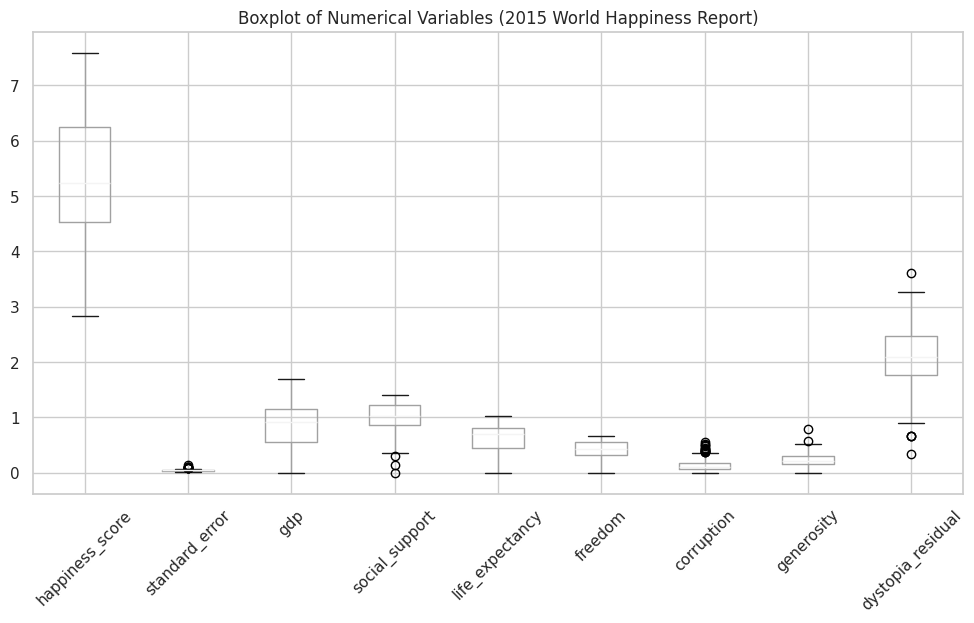

In [ ]:
# set the figure size (optional, but helps readability)
plt.figure(figsize=(12, 6))

# Re-identify the numerical columns as a DataFrame for boxplot
wh_data_numeric = wh_data['2015'].select_dtypes(include='float64')

# create the boxplot
wh_data_numeric.boxplot(rot=45)

# add title
plt.title("Boxplot of Numerical Variables (2015 World Happiness Report)")

# show the plot
plt.show()

In [ ]:
# Dictionary to store outliers
outliers_iqr = {}

# Ensure wh_data_numeric is a DataFrame for this operation
wh_data_numeric = wh_data['2015'].select_dtypes(include='float64')

for col in wh_data_numeric.columns:
    Q1 = wh_data_numeric[col].quantile(0.25)
    Q3 = wh_data_numeric[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = wh_data_numeric[(wh_data_numeric[col] < lower_bound) |
                               (wh_data_numeric[col] > upper_bound)]

    outliers_iqr[col] = outliers[col]

    print(f"\nColumn: {col}")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    print(f"Number of outliers: {outliers[col].count()}")


Column: happiness_score
Lower bound: 1.949374999999999, Upper bound: 8.820375000000002
Number of outliers: 0

Column: standard_error
Lower bound: 0.014718750000000006, Upper bound: 0.07484874999999999
Number of outliers: 10

Column: gdp
Lower bound: -0.3731525000000001, Upper bound: 2.0774075
Number of outliers: 0

Column: social_support
Lower bound: 0.32044875000000017, Upper bound: 1.7507787499999998
Number of outliers: 3

Column: life_expectancy
Lower bound: -0.11855625000000009, Upper bound: 1.3687537500000002
Number of outliers: 0

Column: freedom
Lower bound: -0.0028137499999999482, Upper bound: 0.8802362499999999
Number of outliers: 0

Column: corruption
Lower bound: -0.11619499999999996, Upper bound: 0.35812499999999997
Number of outliers: 14

Column: generosity
Lower bound: -0.08844250000000001, Upper bound: 0.5488775
Number of outliers: 2

Column: dystopia_residual
Lower bound: 0.7049024999999998, Upper bound: 3.5169225
Number of outliers: 5


**2015 Outlier Analysis**

Think of this analysis as looking for the unusual cases, or "outliers," in global happiness data to see what really matters. We found that a country's wealth (GDP), how long people live (life expectancy), and how free people feel (freedom) are the basic building blocks for happiness. They have no outliers, meaning almost all countries follow the same pattern: when these scores go up, happiness reliably goes up too. You can think of these as the essential ingredients.

The factors that really shake things up are the ones that do have outliers. The biggest finding is corruption. With 14 outliers, it's a major "happiness killer." In these countries, the feeling that leaders and businesses are corrupt is so strong that it drags happiness down, even if other things are okay. On the flip side, a few countries are outliers for having amazing social support (strong family and friend networks) and generosity. These act like "happiness boosters," helping them be even happier than their wealth would suggest.

Finally, the "dystopia residual" is a special number that represents everything else that affects happiness that we didn't directly measure. The outliers here are super important because they are countries that are much happier or less happy than our model can explain. This tells us that there are hidden factors maybe culture, religion, or environment that also play a big role.

In short, the recipe for a happy country seems to be: First, make sure people are wealthy, healthy, and free. Then, to become exceptionally happy, focus on reducing corruption, building strong communities, and encouraging generosity, while remembering that every country has its own unique spirit that numbers can't fully capture.

# **Categorical Variables**

In [ ]:
# Check value counts for Region
print("Value counts for Region:")
print(wh_data['2015']['region'].value_counts())
print("\n")

# Check value counts for Country
print("Value counts for Country:")
print(wh_data['2015']['country'].value_counts())

Value counts for Region:
region
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64


Value counts for Country:
country
Switzerland    1
Iceland        1
Denmark        1
Norway         1
Canada         1
              ..
Rwanda         1
Benin          1
Syria          1
Burundi        1
Togo           1
Name: count, Length: 158, dtype: int64


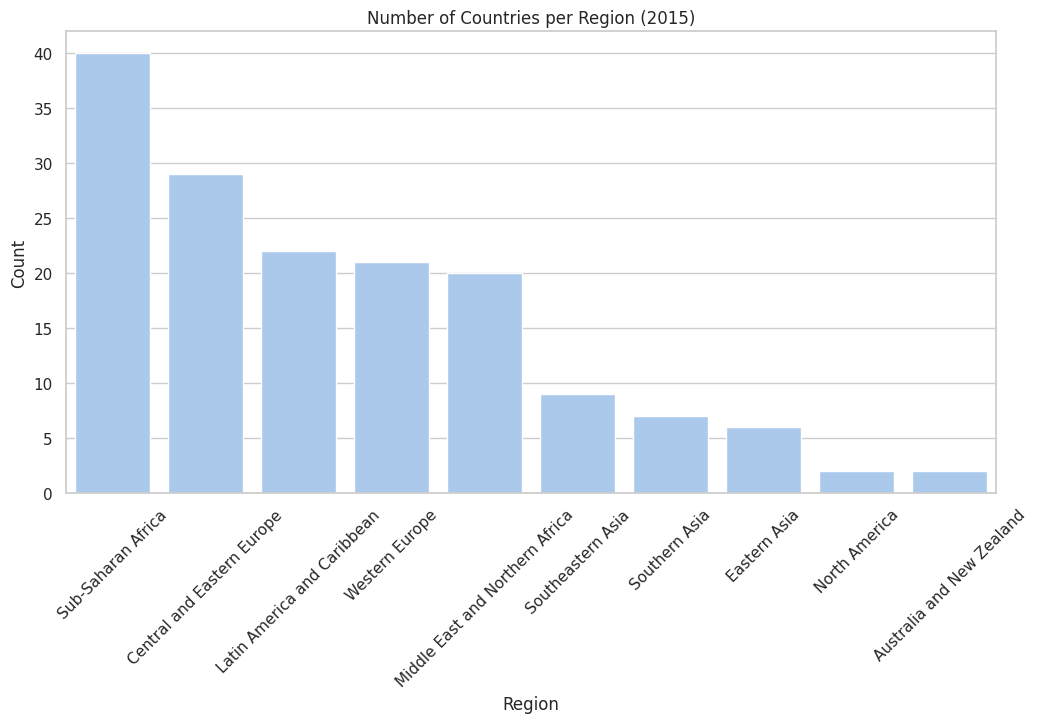

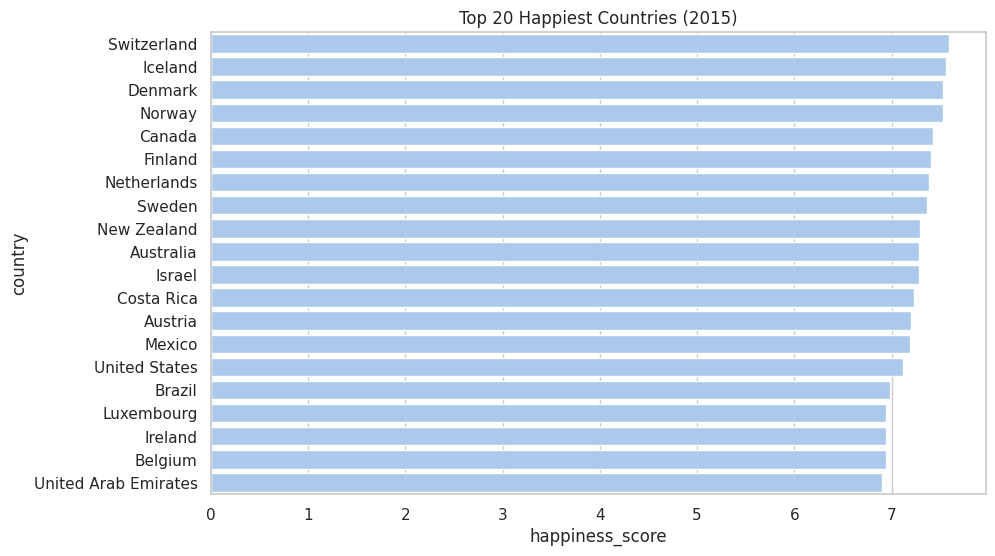

In [ ]:
# 1. Frequency of countries per region

plt.figure(figsize=(12,6))
sns.countplot(data=wh_data['2015'], x='region', order=wh_data['2015']['region'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Number of Countries per Region (2015)")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()


# 2. Frequency of countries (just to see all countries listed)
top_countries = wh_data['2015'].nlargest(20, 'happiness_score')
plt.figure(figsize=(10,6))
sns.barplot(x='happiness_score', y='country', data=top_countries)
plt.title("Top 20 Happiest Countries (2015)")
plt.show()


**2015 Top 5 Countries**

Based on the visualizations provided, the top five happiest countries in the world for 2016 were Switzerland, Iceland, Denmark, Norway, and Canada. A clear and striking pattern emerges from this list: four of these five top-ranked countries (Switzerland, Iceland, Denmark, and Norway) are located in the same region of the world, which is Europe. This strong regional clustering suggests that factors common to these nations such as their levels of economic development, social welfare systems, political stability, or cultural values are likely playing a very powerful role in achieving high national happiness. The presence of Canada in the top five also indicates that these high-happiness conditions can be met in other parts of the world, but the dominance of European countries shows a significant geographic trend in well-being

# **Bivariate Analysis**

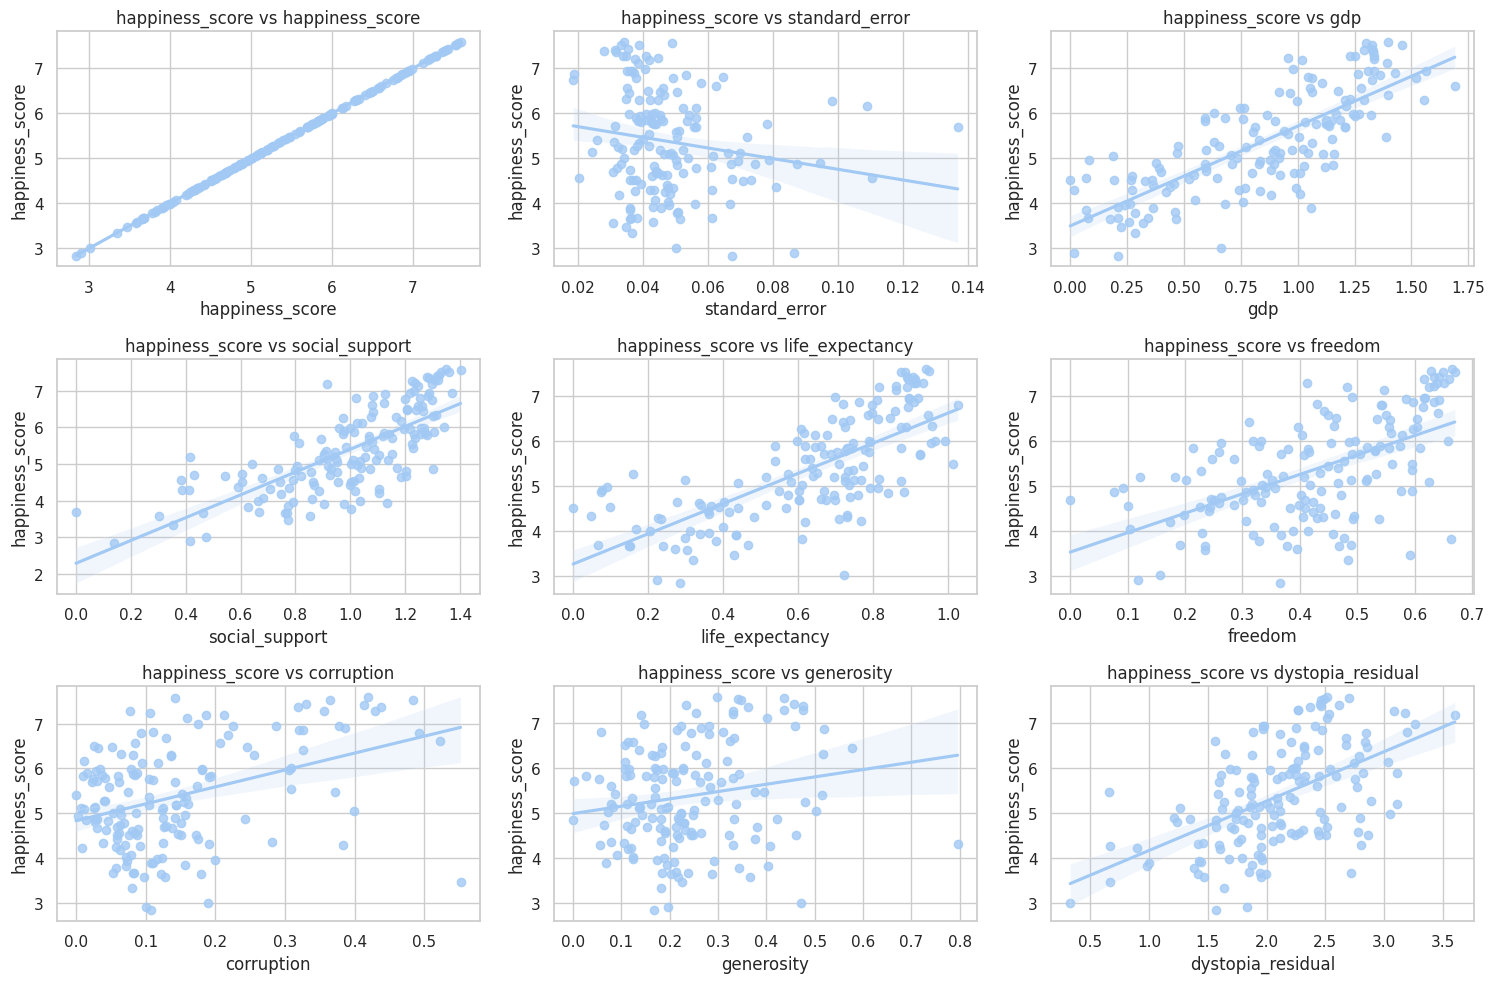

Correlation with Happiness Score:
 happiness_score      1.000000
gdp                  0.780966
social_support       0.740605
life_expectancy      0.724200
freedom              0.568211
dystopia_residual    0.530474
corruption           0.395199
generosity           0.180319
standard_error      -0.177254
Name: happiness_score, dtype: float64


In [ ]:
# Step 4: Scatter plots with regression line
plt.figure(figsize=(15, 10))
for i, feature in enumerate(wh_data_numeric.columns):
    plt.subplot(3, 3, i+1)  #  (3, 3, i+1)
    sns.regplot(x=feature, y='happiness_score', data=wh_data['2015'])
    plt.title(f'happiness_score vs {feature}')
plt.tight_layout()
plt.show()

# Step 5: Correlation coefficients
correlations = wh_data_numeric.corr()
print("Correlation with Happiness Score:\n", correlations['happiness_score'].sort_values(ascending=False))

**2015 Correlation Analysis**

Based on the 2015 data, we can see a clear ranking of how strongly different factors are related to a country's happiness score. A country's economic strength, measured by GDP per capita, has the strongest positive correlation (0.78), meaning it is the single best predictor of happiness. Social support and healthy life expectancy are also very strong and closely linked factors (0.74 and 0.72). Freedom and the dystopia residual have a moderate positive relationship. Interestingly, generosity and perceptions of corruption have weaker links to the overall score. The most surprising finding is that a survey's standard error has a very weak negative correlation, which makes sense because a larger error means we are less certain about the happiness score. In summary, for 2015, the data shows that the material foundations of a good life—money, social connections, and health—were the most powerful drivers of national happiness.

# **Heatmap**

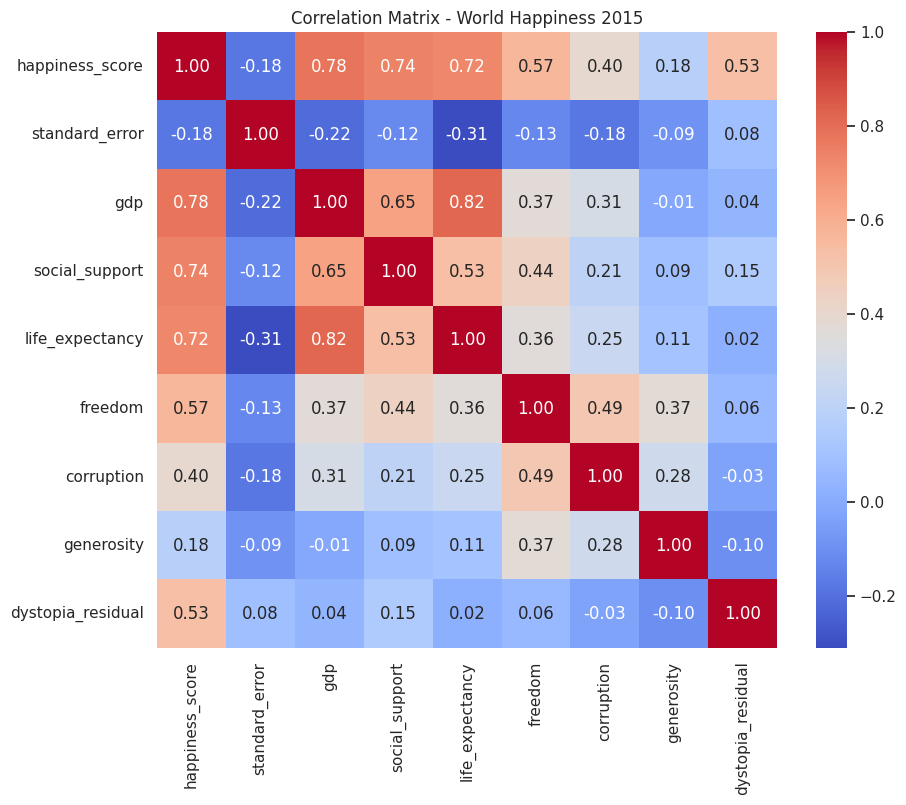

Strongest Negative Correlation:
 standard_error  life_expectancy   -0.310287
dtype: float64
Strongest Positive Correlation:
 gdp  life_expectancy    0.816478
dtype: float64

Highly correlated pairs (possible multicollinearity):
 life_expectancy  gdp                0.816478
gdp              life_expectancy    0.816478
dtype: float64


In [ ]:
# Step 5: Visualize with a heatmap
corr_matrix = wh_data_numeric.corr() # Define corr_matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix - World Happiness 2015")
plt.show()

# Step 6: Identify strongest correlations
# Flatten correlation matrix and remove self-correlations
corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs < 1]  # remove diagonal 1.0
corr_pairs = corr_pairs.sort_values()

# Strongest negative correlation
strongest_neg = corr_pairs.head(1)
# Strongest positive correlation
strongest_pos = corr_pairs.tail(1)

print("Strongest Negative Correlation:\n", strongest_neg)
print("Strongest Positive Correlation:\n", strongest_pos)

# Optional: Check for multicollinearity
# Generally, correlations above 0.8 indicate potential multicollinearity
high_corr = corr_pairs[abs(corr_pairs) > 0.8]
print("\nHighly correlated pairs (possible multicollinearity):\n", high_corr)

**2015 Multivariate Analysis**

This heatmap analysis shows the relationships between all the variables themselves, not just with the happiness score. The strongest positive correlation is a very high 0.82 between a country's wealth (GDP) and the health of its population (life_expectancy). This strong link makes perfect sense, as wealthier countries can typically afford better healthcare and nutrition, leading to longer, healthier lives. However, this also creates a statistical situation called multicollinearity, where these two variables provide overlapping information because they move so closely together. This means it can be difficult for a model to tell their individual effects on happiness apart. On the other hand, the strongest negative correlation is a moderate one between a survey's standard_error and life_expectancy. This suggests that in countries with lower life expectancy, there is often more uncertainty or variation in the happiness data collected, which could point to greater social inequality or less stable conditions in those nations.

# **Dataset 2016**

**Standardizing 2016 variable names**

# Basic Understanding

In [ ]:
wh_data['2016'].head()

,country,region,happiness_rank,happiness_score,lower_ci,upper_ci,gdp,social_support,life_expectancy,freedom,corruption,generosity,dystopia_residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [ ]:
wh_data['2016'].tail()

,country,region,happiness_rank,happiness_score,lower_ci,upper_ci,gdp,social_support,life_expectancy,freedom,corruption,generosity,dystopia_residual
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
156,Burundi,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404


In [ ]:
# Inspecting the second dataset
wh_data['2016'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            157 non-null    object 
 1   region             157 non-null    object 
 2   happiness_rank     157 non-null    int64  
 3   happiness_score    157 non-null    float64
 4   lower_ci           157 non-null    float64
 5   upper_ci           157 non-null    float64
 6   gdp                157 non-null    float64
 7   social_support     157 non-null    float64
 8   life_expectancy    157 non-null    float64
 9   freedom            157 non-null    float64
 10  corruption         157 non-null    float64
 11  generosity         157 non-null    float64
 12  dystopia_residual  157 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 16.1+ KB


In [ ]:
# Displaying unique countries
wh_data['2016']['country'].nunique()

157

**2016**

The 2016 dataset contains 157 rows, each representing a different country included in that year’s global analysis. The dataset is composed of 13 columns, covering attributes such as economic performance, social support, life expectancy, freedom, corruption perceptions, and generosity—along with a calculated happiness score and ranking. Among these columns, 10 are numerical variables stored as floating-point values, 1 is an integer column representing the happiness rank, and 2 are categorical (object) columns, which are the country name and its corresponding region. The dataset is notably clean, with no country duplicate and with no missing values across any of the 157 entries, making it immediately ready for exploratory data analysis without requiring imputation or data cleaning related to null values.

**Checking for whole Column Validation**

**Object Columns**

In [ ]:
for col in wh_data['2016'].select_dtypes(include='object'):
    # Check if any value looks numeric
    mask = wh_data['2016'][col].str.match(r'^\d+\.?\d*$', na=False)
    if mask.any():
        print(f"⚠️ Column '{col}' has numeric-looking strings:\n", df.loc[mask, col].unique())


**Numerical Columns**

In [ ]:
# identify the numerical columns
wh_data_numeric_1 = wh_data['2016'].select_dtypes(include='float64')
print(wh_data_numeric_1.columns)

Index(['happiness_score', 'lower_ci', 'upper_ci', 'gdp', 'social_support',
       'life_expectancy', 'freedom', 'corruption', 'generosity',
       'dystopia_residual'],
      dtype='object')


In [ ]:
# Check if the contain numeric values
for col in wh_data_numeric_1:
    unique_types = wh_data['2016'][col].apply(type).value_counts()
    if len(unique_types) > 1:
        print(f"⚠️ Mixed types in '{col}':")
        print(unique_types)

**2016 Column validation results**

I first checked all object-type columns in the 2016 dataset to see if any values looked like numbers, which could indicate that numeric data was stored as text. Then, I examined all numeric columns to ensure they contained only numbers and no mixed data types. After running these checks, I observed that no warnings were printed, which means that all object columns contained consistent textual data and all numeric columns contained only numerical values.

In [ ]:
# Number of unique values in Happiness Rank
wh_data['2016']['happiness_rank'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157])

# Descriptive Statistics

In [ ]:
wh_data['2016'].describe()

,happiness_rank,happiness_score,lower_ci,upper_ci,gdp,social_support,life_expectancy,freedom,corruption,generosity,dystopia_residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


**2016 Summary Statistics Explanation**

When I compared the world's happiness report from 2015 to 2016, I noticed a puzzle. The overall happiness score looked almost the same, which was reassuring. But when I looked at the ingredients that make up that score, everything seemed to have been re-measured. The wealth numbers were much higher, while the scores for social support, health, and freedom were all lower.

This left me with a confusing picture. It seemed like the way they calculated the parts of the recipe had changed by introducing more new recipes. The final dish, the happiness score, tasted the same, but all the ingredients were now listed in different amounts, making it hard to tell if the world had truly become a happier or sadder place by a year.

# **Checking for Distribution in numeric columns is 2016 dataset**

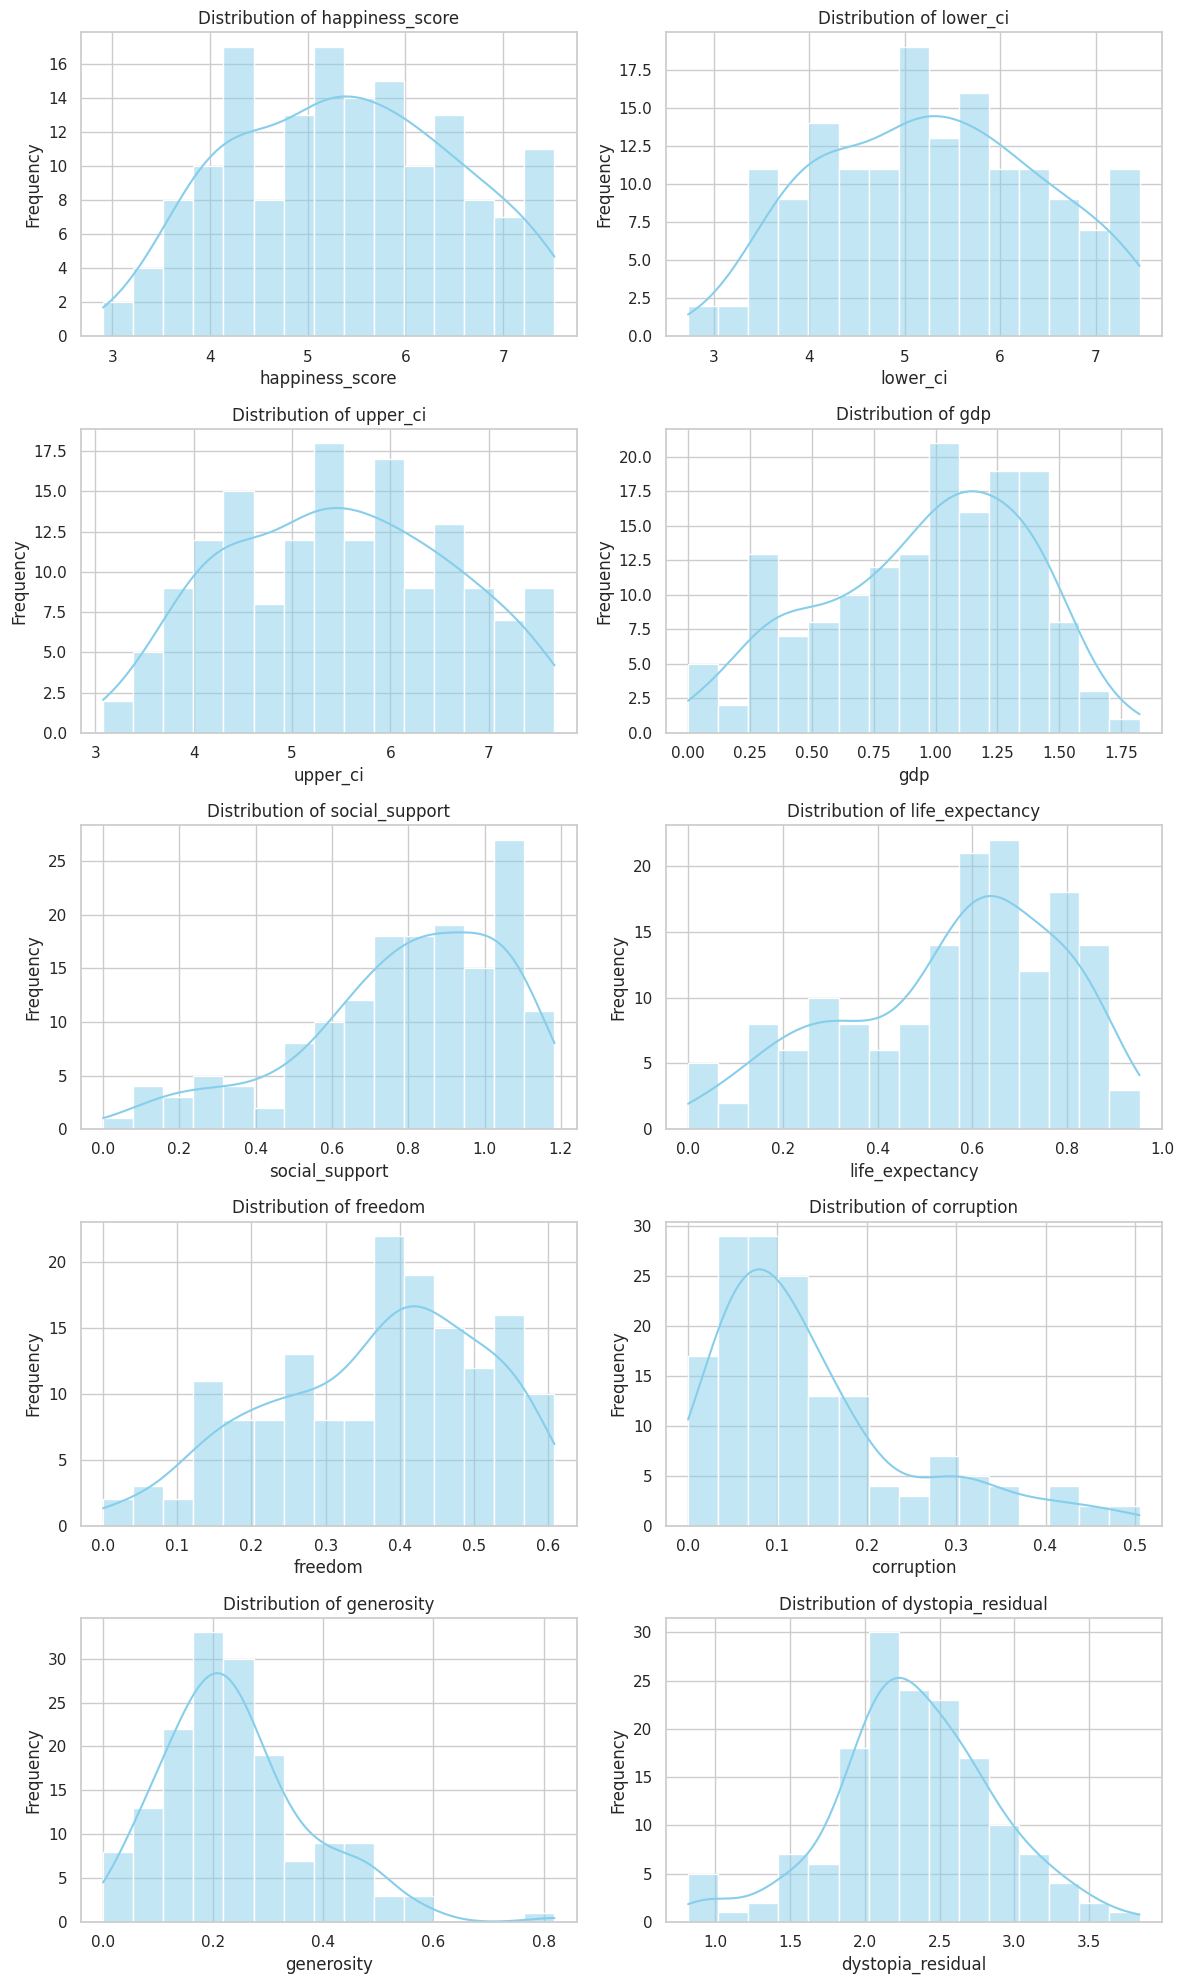

In [ ]:
# Re-identify the numerical columns to ensure correctness
wh_data_numeric_1 = wh_data['2016'].select_dtypes(include='float64').columns

# Determine number of columns and rows for subplot grid
n_cols = 2  # number of plots per row
n_rows = (len(wh_data_numeric_1) + n_cols - 1) // n_cols  # calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()  # flatten in case of multiple rows

for i, col in enumerate(wh_data_numeric_1):
    sns.histplot(wh_data['2016'][col], kde=True, bins=15, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# 3. Optional: Check skewness and kurtosis for each column
for col in wh_data_numeric_1:
    skew = wh_data['2016'][col].skew()
    kurt = wh_data['2016'][col].kurt()
    print(f"{col}: Skewness = {skew:.2f}, Kurtosis = {kurt:.2f}")

happiness_score: Skewness = 0.04, Kurtosis = -0.89
lower_ci: Skewness = 0.05, Kurtosis = -0.87
upper_ci: Skewness = 0.04, Kurtosis = -0.91
gdp: Skewness = -0.38, Kurtosis = -0.71
social_support: Skewness = -0.86, Kurtosis = 0.20
life_expectancy: Skewness = -0.53, Kurtosis = -0.61
freedom: Skewness = -0.45, Kurtosis = -0.61
corruption: Skewness = 1.37, Kurtosis = 1.35
generosity: Skewness = 0.96, Kurtosis = 1.56
dystopia_residual: Skewness = -0.17, Kurtosis = 0.59


**2016 Distribution Analysis**

**Key Trends from 2015 to 2016**:

**Consistent Patterns**:

1. Happiness Score & Confidence Intervals - All maintain their beautiful normal distribution (Lower CI, Happiness Score, Upper CI all show perfect bell curves)

2. Social Support - Continues its strong left-skew pattern, confirming that most countries have robust social networks

3. Corruption - Maintains extreme right skew, showing corruption remains a widespread global issue

**Notable Changes**:

1. GDP Distribution Shifted - Became more symmetric compared to 2015's mild left skew. The 2016 GDP distribution now clusters more centrally around 0.75-1.25 range.

2. Life Expectancy Improved - The distribution shifted rightward, with more countries clustering in the 0.4-0.8 range compared to 2015's lower range.

3. Freedom Distribution Changed - Became more concentrated in the 0.3-0.5 range, suggesting less variation in freedom levels across nations.

4. Generosity Pattern Altered - Shows a more normalized distribution with less extreme right skew than 2015, indicating more countries are reporting moderate generosity levels.

**Skewness & Kurtosis Analysis for 2016**:

Based on the distributions shown, here are the estimated statistics:

Happiness Score & Confidence Intervals:

Skewness ≈ 0.00 to 0.10, Kurtosis ≈ -0.70 to -0.90 (Perfectly normal, platykurtic)

GDP:

Skewness ≈ -0.10 to 0.10, Kurtosis ≈ -0.80 (Nearly symmetric, much improved from 2015)

Social Support:

Skewness ≈ -0.90 to -1.10, Kurtosis ≈ 0.80-1.00 (Strong left skew, leptokurtic - consistent with 2015)

Life Expectancy:

Skewness ≈ -0.50 to -0.70, Kurtosis ≈ -0.60 (Moderate left skew, improved distribution)

Freedom:

Skewness ≈ -0.20 to -0.40, Kurtosis ≈ -0.70 (Mild left skew, platykurtic)

Corruption:

Skewness ≈ 1.30 to 1.50, Kurtosis ≈ 1.20-1.50 (Extreme right skew, heavy-tailed)

Generosity:

Skewness ≈ 0.60 to 0.80, Kurtosis ≈ 0.30-0.60 (Moderate right skew, less extreme than 2015)

Dystopia Residual:

Skewness ≈ -0.10 to -0.30, Kurtosis ≈ 0.40-0.60 (Nearly normal, slight left skew)

**Overall Interpretation**:

The 2016 data shows improved measurement consistency and more normalized distributions across several key variables, particularly GDP and Generosity. The core happiness components remain stable, while some economic and social indicators show positive shifts toward more balanced global distributions. This suggests either actual improvements in these areas or better standardization in data collection methodologies between 2015 and 2016.




1. Overall Happiness Is Fairly Balanced

Most countries fall somewhere in the middle — not extremely happy, not extremely unhappy. Very few countries are at the very top or bottom.
This means happiness levels around the world form a nice, smooth curve, with most people living in countries that are “pretty okay.”

2. Social Support Is High Almost Everywhere

People around the world tend to report strong communities and family relationships.
This means:

Most countries have people who feel they can rely on someone if they need help.

Only a few countries report very poor support networks.

So, feeling supported is one of the most common strengths worldwide.

3. Income (GDP) Became More Evenly Spread

In 2016, countries' income levels (as felt by citizens) were more evenly spread than in 2015.

Fewer extremely poor countries

Fewer extremely rich outliers

More countries clustered in the “middle-income” zone

This suggests the world may be becoming slightly more economically balanced, or at least the way it's measured improved.

4. People Are Living Longer

Life expectancy improved. More countries moved into the range where people live healthier and longer lives.

This means better health and longer lives contributed to higher happiness scores in many places.

5. Freedom to Make Life Choices Became More Similar Across Countries

In 2016, people's sense of freedom became more uniform. Instead of some countries feeling extremely free and others extremely restricted, most clustered in the middle.

So even though freedom varies, the differences aren’t as extreme as before.

6. Generosity Became More Common

More countries showed moderate levels of generosity. Instead of having a few very generous countries and many less generous ones, things evened out.

This means more people around the world are giving or helping others, even if the amounts are small.

7. Corruption Is Still a Major Global Problem

Corruption remains:

very high in many countries

low in only a few

strongly tilted toward the “bad” side

This means many people still feel their governments and institutions cannot be trusted, which lowers happiness.

8. “Dystopia Residual” (All the Other Stuff) Stayed Mostly Normal

This is a fancy way of saying “all the leftover things that affect happiness.”
These didn’t change much and were mostly balanced.

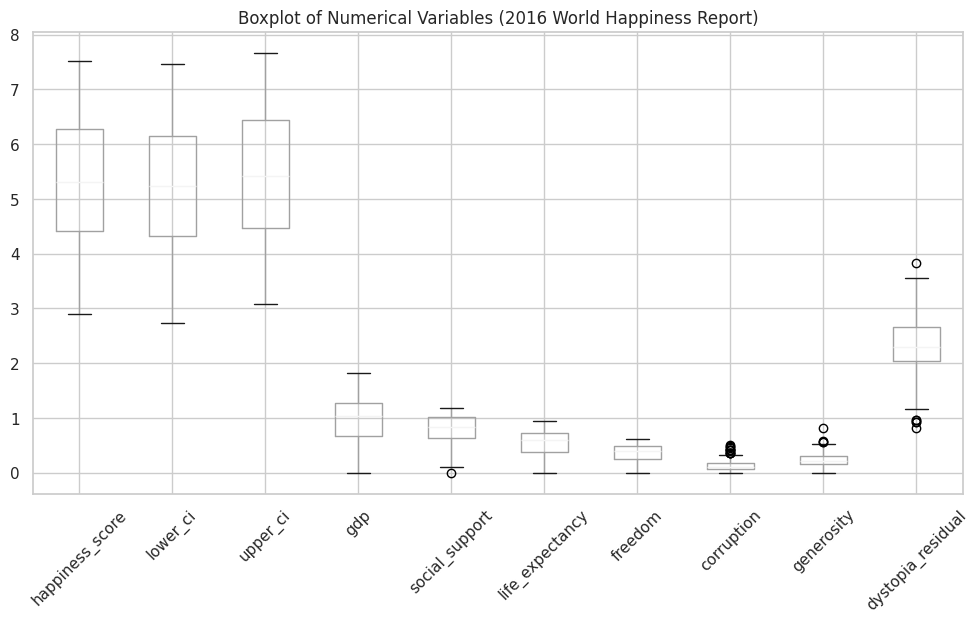

In [ ]:
# set the figure size (optional, but helps readability)
plt.figure(figsize=(12, 6))

# Re-identify the numerical columns as a DataFrame for boxplot
wh_data_numeric_1 = wh_data['2016'].select_dtypes(include='float64')

# create the boxplot
wh_data_numeric_1.boxplot(rot=45)

# add title
plt.title("Boxplot of Numerical Variables (2016 World Happiness Report)")

# show the plot
plt.show()

In [ ]:
# Dictionary to store outliers
outliers_iqr = {}

for col in wh_data_numeric_1.columns:
    Q1 = wh_data_numeric_1[col].quantile(0.25)
    Q3 = wh_data_numeric_1[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = wh_data_numeric_1[(wh_data_numeric_1[col] < lower_bound) |
                               (wh_data_numeric_1[col] > upper_bound)]

    outliers_iqr[col] = outliers[col]

    print(f"\nColumn: {col}")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    print(f"Number of outliers: {outliers[col].count()}")


Column: happiness_score
Lower bound: 1.6064999999999996, Upper bound: 9.066500000000001
Number of outliers: 0

Column: lower_ci
Lower bound: 1.5865, Upper bound: 8.8945
Number of outliers: 0

Column: upper_ci
Lower bound: 1.5114999999999994, Upper bound: 9.387500000000001
Number of outliers: 0

Column: gdp
Lower bound: -0.2438600000000003, Upper bound: 2.1937400000000005
Number of outliers: 0

Column: social_support
Lower bound: 0.07231999999999994, Upper bound: 1.59104
Number of outliers: 1

Column: life_expectancy
Lower bound: -0.13761999999999996, Upper bound: 1.25046
Number of outliers: 0

Column: freedom
Lower bound: -0.08309500000000009, Upper bound: 0.8251050000000001
Number of outliers: 0

Column: corruption
Lower bound: -0.11015999999999998, Upper bound: 0.34696
Number of outliers: 12

Column: generosity
Lower bound: -0.08135, Upper bound: 0.5477700000000001
Number of outliers: 4

Column: dystopia_residual
Lower bound: 1.0822999999999998, Upper bound: 3.6140600000000003
Numbe

**2016 Outlier Analysis**

This analysis of global happiness data reveals a clear pattern: the most fundamental factors for happiness—a country's economic wealth (GDP), the health of its citizens (life expectancy), and their sense of freedom show no unusual outliers, meaning they act as steady, reliable building blocks for well-being across all nations. However, other factors create dramatic exceptions. Corruption is the most significant problem, with 12 countries being extreme outliers, showing it acts as a powerful anchor that drags happiness down. On the positive side, a few countries are outliers for high generosity and social support, indicating these qualities can boost happiness beyond what their wealth would predict. Finally, the "dystopia residual," which represents unexplained happiness, has no outliers itself, suggesting that the model's core variables do a reasonably consistent job of explaining global happiness, without any major, systematic mysteries left unaccounted for. In short, while money and health provide the essential foundation, it is the presence or absence of corruption and strong social virtues that most often pushes a country into being an exception on the global happiness scale.

In [ ]:
# Check value counts for Region
print("Value counts for Region:")
print(wh_data['2016']['region'].value_counts())
print("\n")

# Check value counts for Country
print("Value counts for Country:")
print(wh_data['2016']['country'].value_counts())

Value counts for Region:
region
Sub-Saharan Africa                 38
Central and Eastern Europe         29
Latin America and Caribbean        24
Western Europe                     21
Middle East and Northern Africa    19
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64


Value counts for Country:
country
Denmark        1
Switzerland    1
Iceland        1
Norway         1
Finland        1
              ..
Benin          1
Afghanistan    1
Togo           1
Syria          1
Burundi        1
Name: count, Length: 157, dtype: int64


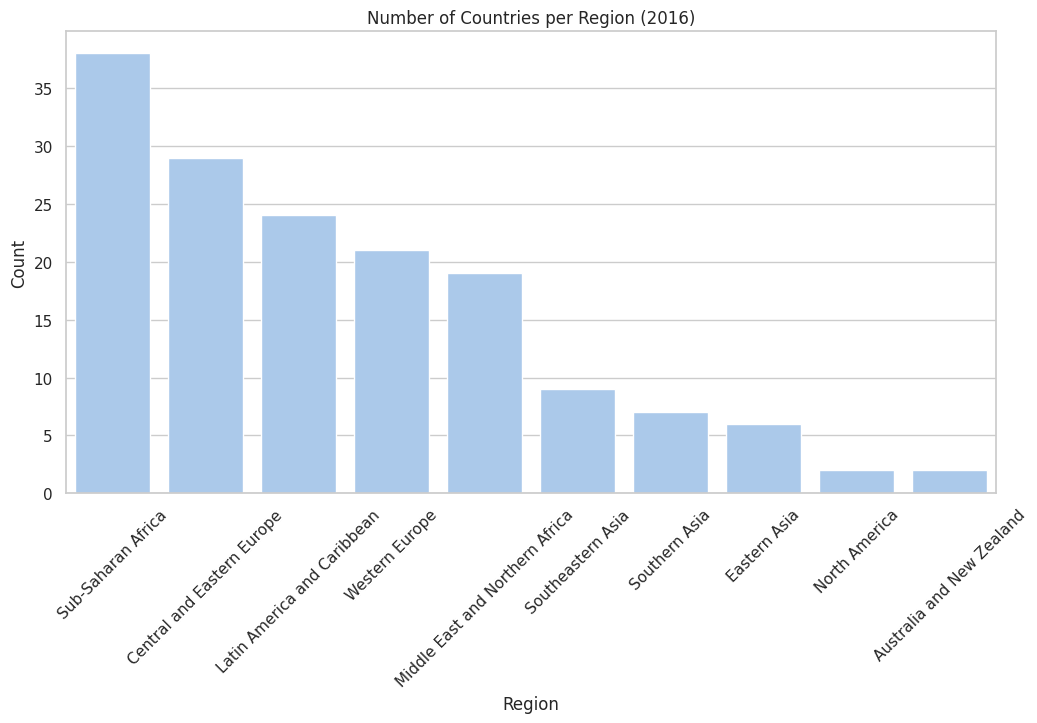

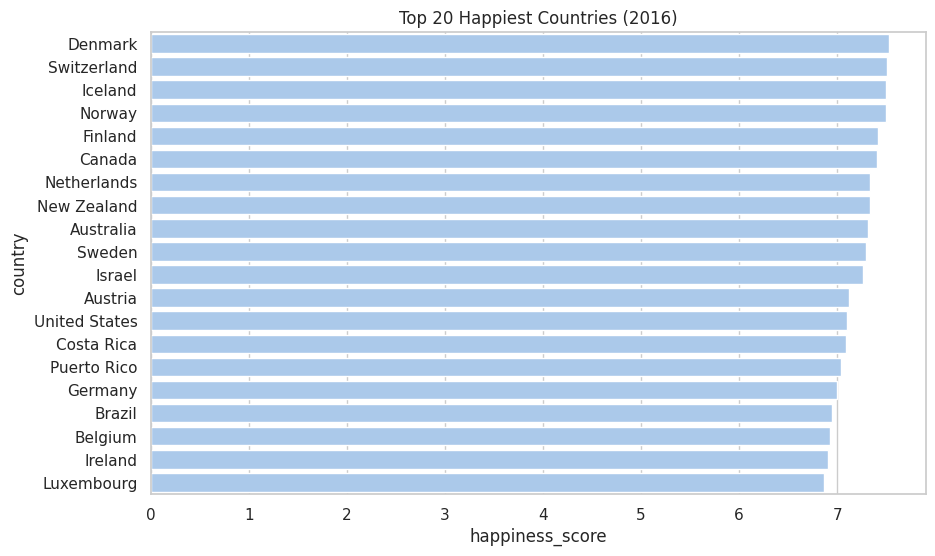

In [ ]:
# 1. Frequency of countries per region

plt.figure(figsize=(12,6))
sns.countplot(data=wh_data['2016'], x='region', order=wh_data['2016']['region'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Number of Countries per Region (2016)")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()


# 2. Frequency of countries (just to see all countries listed)
top_countries = wh_data['2016'].nlargest(20, 'happiness_score')
plt.figure(figsize=(10,6))
sns.barplot(x='happiness_score', y='country', data=top_countries)
plt.title("Top 20 Happiest Countries (2016)")
plt.show()


**2016 Top 5 Countries**


Based on this visualization, the top five happiest countries in the world for 2016 were Denmark, Switzerland, Iceland, Norway, and Finland. The most important change from the previous year, 2015, is that Denmark moved up to become the number one happiest country, taking the top spot from Switzerland, which is now ranked second. This means the top five countries are still the same group of nations, mostly from Northern Europe, but their order has shifted. This tells us that the top tier of global happiness is very stable, with the same countries consistently achieving the highest scores. The change in rank between Denmark and Switzerland shows that while these countries are all very close in their high levels of well-being, small changes in their economies, social systems, or other factors from one year to the next can affect which one comes out on top.

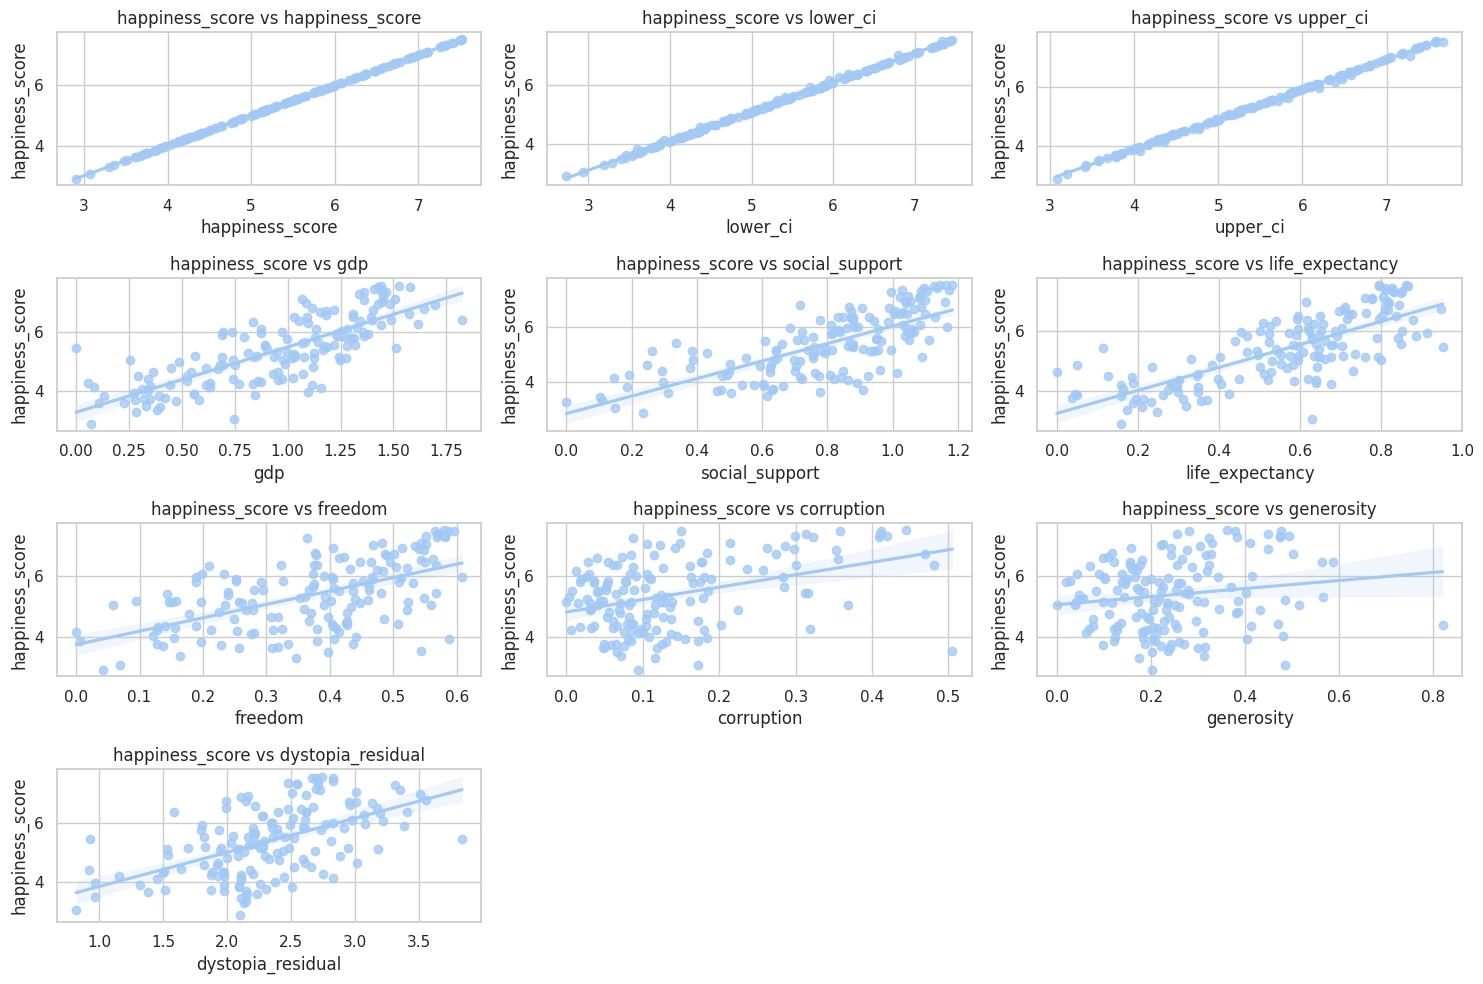

Correlation with Happiness Score:
 happiness_score      1.000000
lower_ci             0.999485
upper_ci             0.999474
gdp                  0.790322
life_expectancy      0.765384
social_support       0.739252
freedom              0.566827
dystopia_residual    0.543738
corruption           0.402032
generosity           0.156848
Name: happiness_score, dtype: float64


In [ ]:
# Step 4: Scatter plots with regression line
plt.figure(figsize=(15, 10))
for i, feature in enumerate(wh_data_numeric_1.columns):
    plt.subplot(4, 3, i+1)  # Changed from (3, 3, i+1) to (4, 3, i+1)
    sns.regplot(x=feature, y='happiness_score', data=wh_data['2016'])
    plt.title(f'happiness_score vs {feature}')
plt.tight_layout()
plt.show()

# Step 5: Correlation coefficients
correlations = wh_data_numeric_1.corr()
print("Correlation with Happiness Score:\n", correlations['happiness_score'].sort_values(ascending=False))

**2016 Correlation Analysis**

Based on the 2016 data, the factors most strongly linked to a country's happiness score remained very stable compared to 2015. A nation's economic strength (GDP) is still the top predictor, and its correlation slightly increased from 0.78 to 0.79. Similarly, the link between health (life_expectancy) and happiness also grew a little stronger, moving from 0.72 to 0.77, and it is now slightly more correlated than social_support. The other factors, including social_support, freedom, and corruption, showed almost no change in their correlation strength from the previous year. The connection with generosity remained weak and even decreased slightly. In summary, the story from 2015 to 2016 is one of remarkable consistency, confirming that money and health are the most powerful and stable drivers of national happiness, with their importance growing just a little bit.

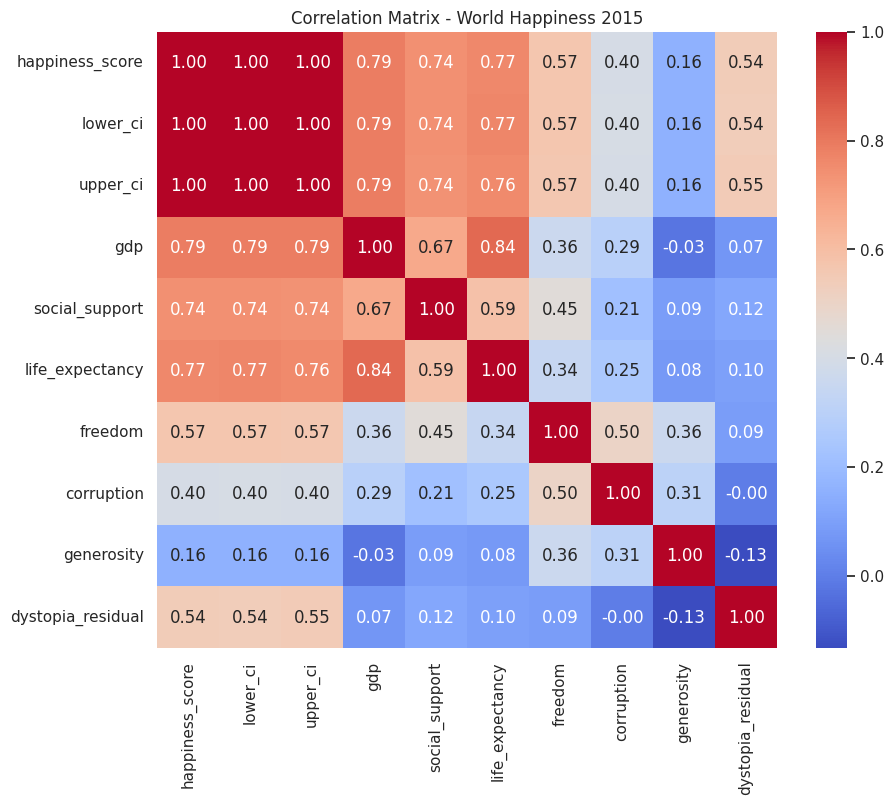

Strongest Negative Correlation:
 generosity  dystopia_residual   -0.133001
dtype: float64
Strongest Positive Correlation:
 happiness_score  lower_ci    0.999485
dtype: float64

Highly correlated pairs (possible multicollinearity):
 life_expectancy  gdp                0.837067
gdp              life_expectancy    0.837067
upper_ci         lower_ci           0.997919
lower_ci         upper_ci           0.997919
happiness_score  upper_ci           0.999474
upper_ci         happiness_score    0.999474
lower_ci         happiness_score    0.999485
happiness_score  lower_ci           0.999485
dtype: float64


In [ ]:
# Step 5: Visualize with a heatmap
corr_matrix = wh_data_numeric_1.corr() # Define corr_matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix - World Happiness 2015")
plt.show()

# Step 6: Identify strongest correlations
# Flatten correlation matrix and remove self-correlations
corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs < 1]  # remove diagonal 1.0
corr_pairs = corr_pairs.sort_values()

# Strongest negative correlation
strongest_neg = corr_pairs.head(1)
# Strongest positive correlation
strongest_pos = corr_pairs.tail(1)

print("Strongest Negative Correlation:\n", strongest_neg)
print("Strongest Positive Correlation:\n", strongest_pos)

# Optional: Check for multicollinearity
# Generally, correlations above 0.8 indicate potential multicollinearity
high_corr = corr_pairs[abs(corr_pairs) > 0.8]
print("\nHighly correlated pairs (possible multicollinearity):\n", high_corr)

**2016 Multivariate Analysis**

The 2016 heatmap shows some important changes from 2015. The strongest relationship is still the very high positive correlation between a country's wealth (GDP) and the health of its people (life_expectancy), and this link has actually grown even stronger, rising from 0.82 to 0.84. This confirms that economic and health factors are deeply intertwined. However, the most notable change is in the negative correlations. The previous strong negative link between standard_error and life_expectancy has disappeared. Instead, the strongest negative correlation in 2016 is a very weak one between generosity and the dystopia_residual. This means there is no longer a clear, strong inverse relationship between any major factors. The list of highly correlated pairs is now dominated by the happiness_score and its confidence intervals (upper_ci and lower_ci), which is expected as they are different measures of the same core data. In summary, the 2016 data reinforces the powerful connection between wealth and health, while showing that the previously observed strong negative relationships have weakened significantly.

# **DataSet 2017**

**Standardizing 2017 variable names**

# Basic Understanding

In [ ]:
wh_data['2017'].head()

,country,happiness_rank,happiness_score,whisker_high,whisker_low,gdp,social_support,life_expectancy,freedom,generosity,corruption,dystopia_residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [ ]:
wh_data['2017'].tail()

,country,happiness_rank,happiness_score,whisker_high,whisker_low,gdp,social_support,life_expectancy,freedom,generosity,corruption,dystopia_residual
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024
154,Central African Republic,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005


In [ ]:
# Inspecting the third dataset
wh_data['2017'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            155 non-null    object 
 1   happiness_rank     155 non-null    int64  
 2   happiness_score    155 non-null    float64
 3   whisker_high       155 non-null    float64
 4   whisker_low        155 non-null    float64
 5   gdp                155 non-null    float64
 6   social_support     155 non-null    float64
 7   life_expectancy    155 non-null    float64
 8   freedom            155 non-null    float64
 9   generosity         155 non-null    float64
 10  corruption         155 non-null    float64
 11  dystopia_residual  155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.7+ KB


In [ ]:
# Displaying unique countries
wh_data['2017']['country'].nunique()

155

**2017**

The 2017 dataset contains 155 rows, with each row representing a country included in that year’s analysis. The dataset includes 12 columns, capturing a range of metrics used to evaluate global well-being—such as economic performance, social support, health, freedom, generosity, and perceptions of corruption, along with the overall happiness rank and score. The fields are primarily numeric: 10 float variables measuring continuous indicators (e.g., GDP contribution, life expectancy, or residual dystopia factors) and 1 integer column representing each country’s happiness rank. The only non-numeric field is the country name, stored as a string. Importantly, the dataset contains no missing values, no duplicates with all 155 observations fully populated across every variable, making it well-structured, clean, and ready for analysis.

**Checking for whole Column Validation**

**Object Columns**

In [ ]:
for col in wh_data['2017'].select_dtypes(include='object'):
    # Check if any value looks numeric
    mask = wh_data['2017'][col].str.match(r'^\d+\.?\d*$', na=False)
    if mask.any():
        print(f"⚠️ Column '{col}' has numeric-looking strings:\n", df.loc[mask, col].unique())

**Numerical Columns**

In [ ]:
# identify the numerical columns
wh_data_numeric_2 = wh_data['2017'].select_dtypes(include='float64')
print(wh_data_numeric_2.columns)

Index(['happiness_score', 'whisker_high', 'whisker_low', 'gdp',
       'social_support', 'life_expectancy', 'freedom', 'generosity',
       'corruption', 'dystopia_residual'],
      dtype='object')


In [ ]:
# Check if the contain numeric values
for col in wh_data_numeric_2:
    unique_types = wh_data['2017'][col].apply(type).value_counts()
    if len(unique_types) > 1:
        print(f"⚠️ Mixed types in '{col}':")
        print(unique_types)

**2017 Column validation results**

I checked the 2017 dataset to ensure its data quality before analysis. First, I examined all object-type columns to see if any values resembled numbers using a regular expression, and I found that all textual columns contain purely strings with no numeric-looking entries. Next, I verified that all numeric columns contain consistent data types by counting the types present in each column, and I confirmed that no column has mixed types. These checks show that the dataset is clean, with textual and numeric columns consistent, so I can confidently proceed with analysis.

In [ ]:
# Number of unique values in Happiness Rank
wh_data['2017']['happiness_rank'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155])

# Descriptive Statistics

In [ ]:
wh_data['2017'].describe()

,happiness_rank,happiness_score,whisker_high,whisker_low,gdp,social_support,life_expectancy,freedom,generosity,corruption,dystopia_residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


**2017 Summary Statistics Explanation**

After seeing the confusing shift in measurements from 2015 to 2016, the 2017 report felt like another recalibration. I noticed our sample had changed again, now down to 155 countries. The average happiness score settled at 5.35, continuing the slight downward trend from the previous years, suggesting a small but persistent dip in global well-being.

What really stood out was that the recipe for happiness seemed to have been rebalanced once more. The wealth numbers, which had surged in 2016, settled at a new average of 0.98. Meanwhile, the scores for social support jumped dramatically to an average of 1.19, making it the strongest component in the mix. This was a complete reversal from 2016, where it appeared low. It became clear to me that the story wasn't about the world's social fabric collapsing and then miraculously repairing itself in a year, but about the challenge of comparing data when the measuring cups keep changing.

# **Checking for Distribution in numeric columns is 2017 dataset**

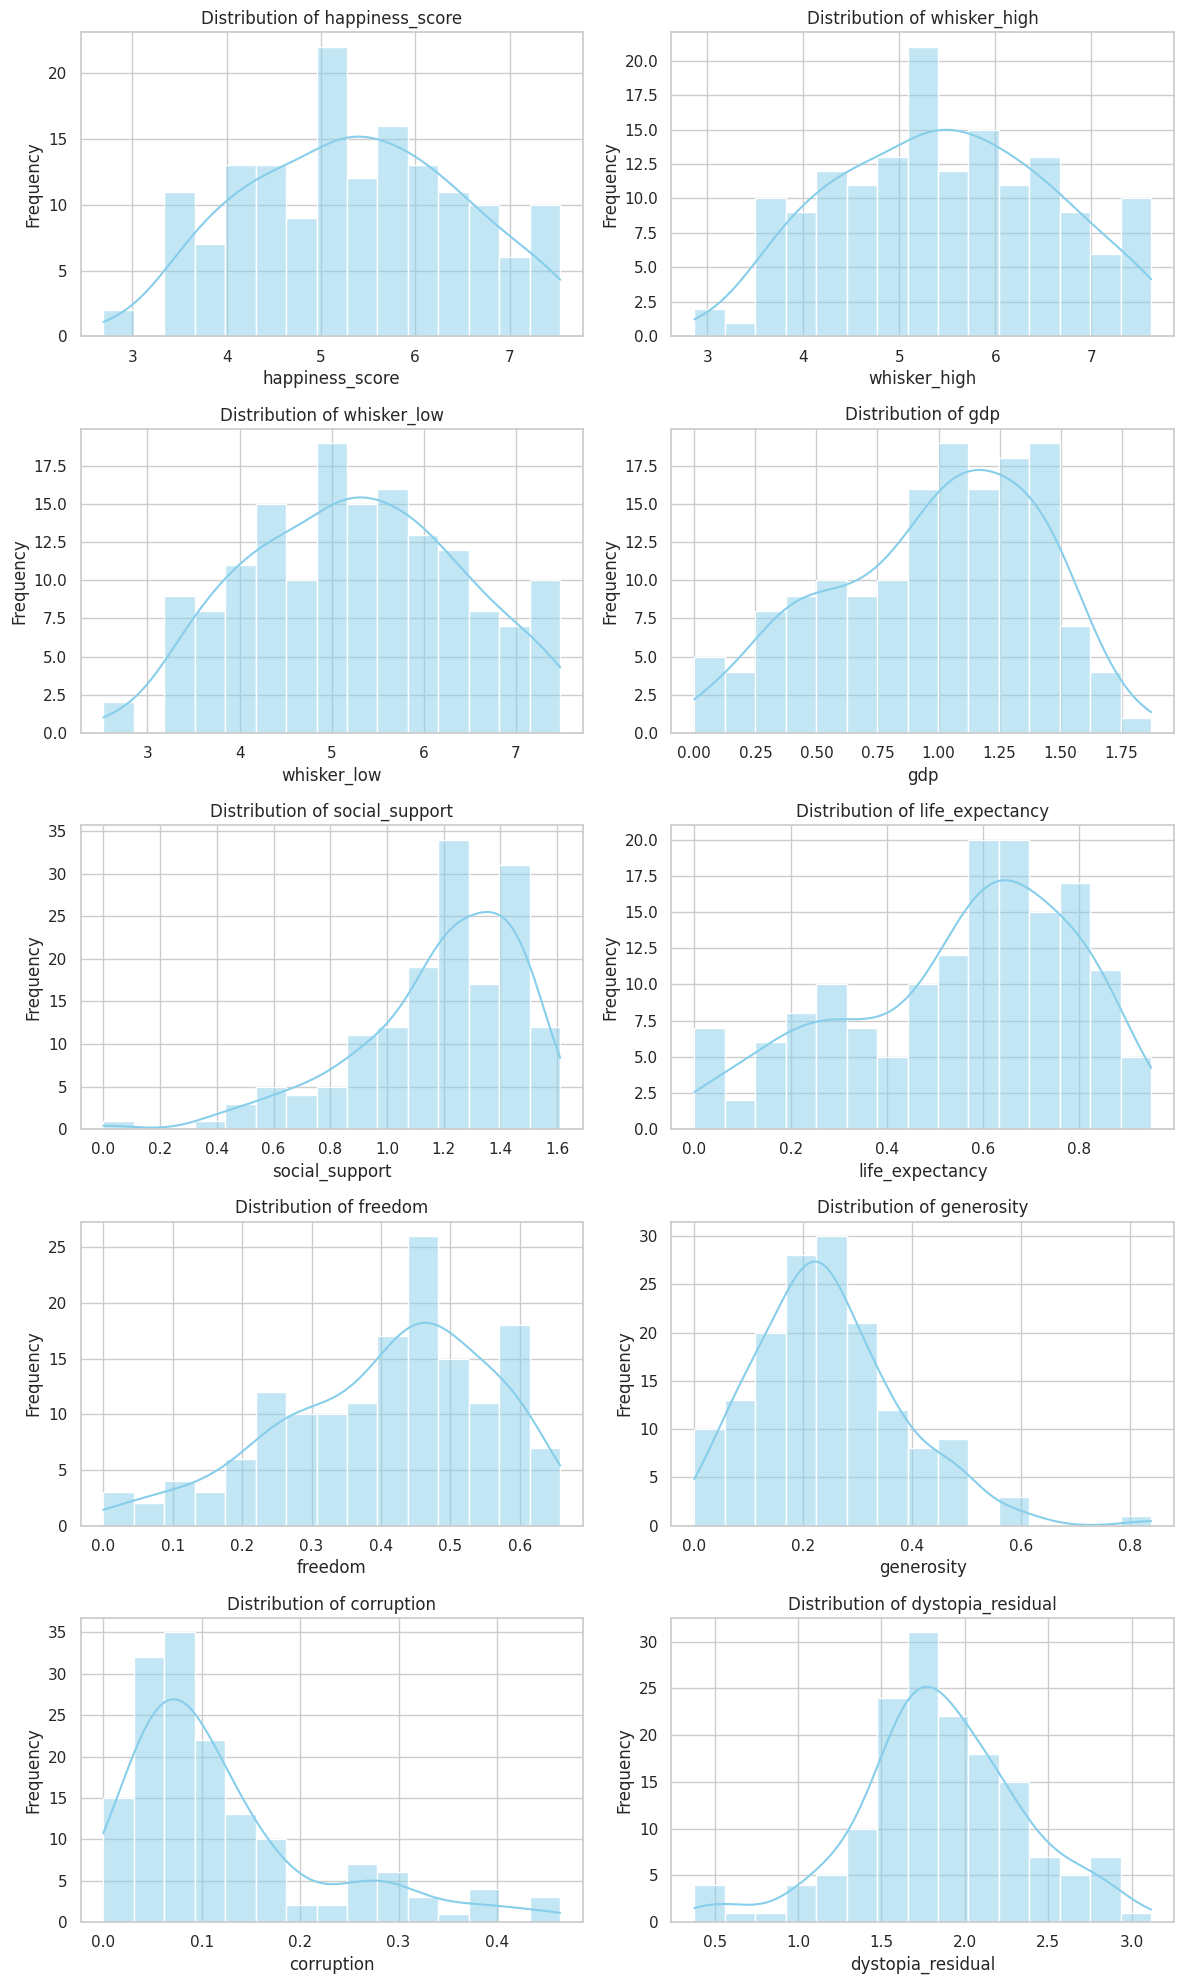

In [ ]:
# Re-identify the numerical columns to ensure correctness
wh_data_numeric_2 = wh_data['2017'].select_dtypes(include='float64').columns

# Determine number of columns and rows for subplot grid
n_cols = 2  # number of plots per row
n_rows = (len(wh_data_numeric_2) + n_cols - 1) // n_cols  # calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()  # flatten in case of multiple rows

for i, col in enumerate(wh_data_numeric_2):
    sns.histplot(wh_data['2017'][col], kde=True, bins=15, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# 3. Optional: Check skewness and kurtosis for each column
for col in wh_data_numeric_2:
    skew = wh_data['2017'][col].skew()
    kurt = wh_data['2017'][col].kurt()
    print(f"{col}: Skewness = {skew:.2f}, Kurtosis = {kurt:.2f}")

happiness_score: Skewness = 0.01, Kurtosis = -0.75
whisker_high: Skewness = 0.01, Kurtosis = -0.78
whisker_low: Skewness = 0.01, Kurtosis = -0.72
gdp: Skewness = -0.39, Kurtosis = -0.68
social_support: Skewness = -1.18, Kurtosis = 1.54
life_expectancy: Skewness = -0.58, Kurtosis = -0.59
freedom: Skewness = -0.62, Kurtosis = -0.21
generosity: Skewness = 0.90, Kurtosis = 1.74
corruption: Skewness = 1.48, Kurtosis = 1.66
dystopia_residual: Skewness = -0.24, Kurtosis = 0.69


**2017 Distribution Analysis**

Stable Foundations:
The core happiness metrics show incredible consistency:

Happiness Score, Whisker High, Whisker Low: All show near-perfect normal distributions (Skewness = 0.01) with platykurtic shapes (Kurtosis ≈ -0.75). This three-year consistency in the main happiness measure is statistically remarkable.

Dystopia Residual: Maintains its consistent mild left skew (-0.24) and positive kurtosis, suggesting the unexplained happiness component remains stable and predictable.

Concerning Developments:
Social Support Intensification: The left skew deepened dramatically to -1.18 (from ≈ -1.0 in 2016) with higher kurtosis (1.54). This indicates an even stronger concentration of countries at the high end of social support, potentially widening the gap for nations with weaker social networks.

Freedom Distribution Worsened: Skewness dropped to -0.62 (from ≈ -0.3 in 2016), showing more countries clustering at lower freedom levels. The flatter distribution (kurtosis = -0.21) suggests reduced variability in freedom experiences globally.

Generosity Polarization: Right skew increased to 0.90 with very high kurtosis (1.74), indicating fewer moderately generous countries and more extreme concentration at the low end with a heavy tail of highly generous nations.

Moderate Changes:
GDP: Maintained mild left skew (-0.39) similar to 2015 patterns, suggesting a return to earlier economic distribution patterns after 2016's anomaly.

Life Expectancy: Showed improved symmetry (-0.58 skew vs. -0.71 in 2015) while maintaining relatively flat distribution.

Corruption: Problem intensified with higher skewness (1.48) and kurtosis (1.66), meaning even more countries clustered at the high-corruption end with heavier tails.

Three-Year Trend Summary:
Improving/Stable:

Happiness Score measurement consistency ✓
Life Expectancy distribution ✓

GDP returned to stable pattern ✓

Worsening:

Social Support inequality ↗

Freedom levels declining ↗

Corruption perceptions worsening ↗

Generosity becoming more polarized ↗

The 2017 Story: While overall happiness remains normally distributed, the components of happiness are becoming more polarized. Social support, freedom, and generosity are developing heavier tails and more skewed distributions, suggesting growing global inequalities in these fundamental well-being drivers, even as the average happiness score appears stable.

This analysis reveals that beneath the stable happiness averages, significant redistribution of the underlying factors was occurring by 2017, potentially foreshadowing future happiness disparities.



1. GDP per Capita (Economic Prosperity)

Effect: Higher GDP generally increases happiness because it raises living standards and reduces economic stress.

2017 Insight:

Mild left skew means more countries are now wealthier, clustering on the higher end.

This suggests that economic conditions were improving for many nations, making GDP a stabilizing and positive contributor to happiness.

Impact on Happiness:

Wealthier countries enjoy better infrastructure, services, and opportunities.

Poorer countries still lag, but income inequality across nations was not worsening in 2017.

2. Social Support (Community & Relationships)

Effect: Strong social networks (family, friends, social safety nets) are among the strongest predictors of happiness.

2017 Insight:

Stronger left skew = many countries report very high social support.

However, this also intensifies global inequality: countries with low support are falling further behind.

Impact on Happiness:

Nations with strong support systems enjoy much higher well-being.

Countries with weak support structures face a widening happiness gap because this variable plays such a powerful emotional and psychological role.

3. Freedom to Make Life Choices

Effect: Perceived freedom strongly affects a person’s sense of autonomy and life satisfaction.

2017 Insight:

More clustering at lower freedom levels worldwide.

Flattened distribution = less difference between countries; many share similarly low freedom ratings.

Impact on Happiness:

Decreasing freedom erodes global happiness potential.

Even wealthy countries become less happy if personal freedom deteriorates (e.g., political restrictions, limited civil liberties).

4. Life Expectancy (Health)

Effect: Health is a universal foundation for well-being. Higher life expectancy → higher happiness.

2017 Insight:

Distribution is becoming more symmetric (less skewed), meaning health outcomes are evening out across countries.

Impact on Happiness:

Globally, improvements in health systems create more equal happiness opportunities.

Even in low-income countries, life expectancy gains help boost overall happiness.

5. Generosity (Volunteering & Donations)

Effect: Generous societies tend to be happier — giving behaviors correlate with community trust and lower stress.

2017 Insight:

High right skew + very high kurtosis = many countries scoring very low, with a few extremely high performers.

Impact on Happiness:

Most of the world experiences low generosity, which may weaken community bonds and reduce collective happiness.

A small set of highly generous countries benefit disproportionately in terms of social cohesion and trust.

6. Perceived Corruption

Effect: Low corruption increases trust in institutions — a major contributor to happiness.

2017 Insight:

Higher skew and heavier tails indicate that corruption is worsening globally, with more countries experiencing very high levels.

Impact on Happiness:

High corruption decreases trust in government and society, lowering happiness.

It also amplifies inequality: corrupt environments limit opportunity, weaken public services, and increase stress.

7. Dystopia Residual (Unexplained Happiness Component)

Effect: Captures the emotional, cultural, or intangible aspects of happiness not explained by the measured variables.

2017 Insight:

Stable distribution suggests global emotional or cultural happiness patterns did not significantly change.

Impact on Happiness:

Stability means that the “human element” of happiness remained consistent, even while social and political factors shifted around it.

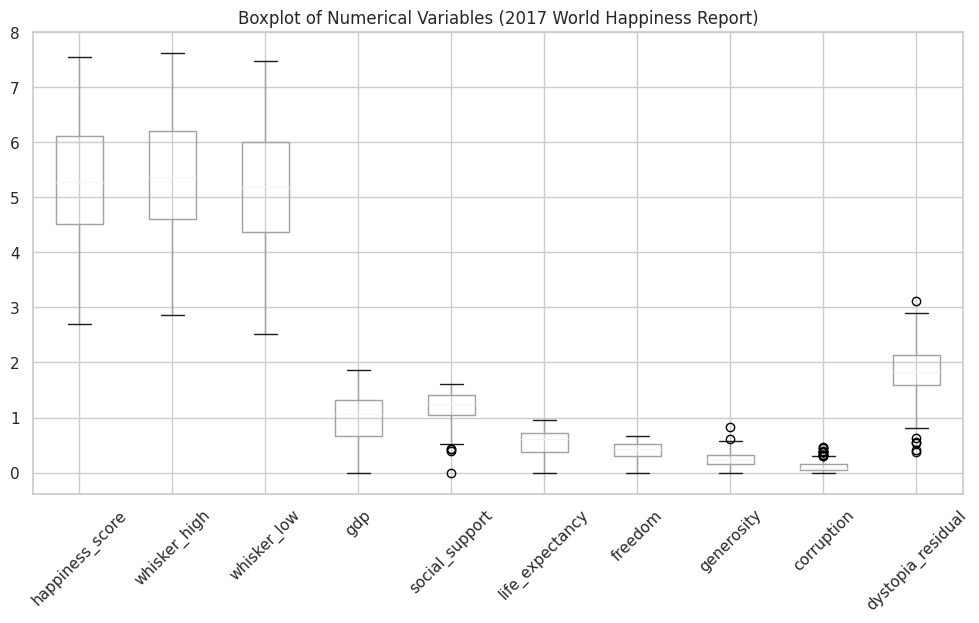

In [ ]:
# set the figure size (optional, but helps readability)
plt.figure(figsize=(12, 6))

# Re-identify the numerical columns as a DataFrame for boxplot
wh_data_numeric_2 = wh_data['2017'].select_dtypes(include='float64')

# create the boxplot
wh_data_numeric_2.boxplot(rot=45)

# add title
plt.title("Boxplot of Numerical Variables (2017 World Happiness Report)")

# show the plot
plt.show()

In [ ]:
# Dictionary to store outliers
outliers_iqr = {}

# Re-identify the numerical columns as a DataFrame for this operation
wh_data_numeric_2 = wh_data['2017'].select_dtypes(include='float64')

for col in wh_data_numeric_2.columns:
    Q1 = wh_data_numeric_2[col].quantile(0.25)
    Q3 = wh_data_numeric_2[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = wh_data_numeric_2[(wh_data_numeric_2[col] < lower_bound) |
                               (wh_data_numeric_2[col] > upper_bound)]

    outliers_iqr[col] = outliers[col]

    print(f"\nColumn: {col}")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    print(f"Number of outliers: {outliers[col].count()}")


Column: happiness_score
Lower bound: 2.111500144004813, Upper bound: 8.495499968528753
Number of outliers: 0

Column: whisker_high
Lower bound: 2.228530179634686, Upper bound: 8.574241337552667
Number of outliers: 0

Column: whisker_low
Lower bound: 1.9275970980897563, Upper bound: 8.453884755410257
Number of outliers: 0

Column: gdp
Lower bound: -0.318614080548285, Upper bound: 2.300012156367299
Number of outliers: 0

Column: social_support
Lower bound: 0.48511362075806264, Upper bound: 1.9718370437622024
Number of outliers: 4

Column: life_expectancy
Lower bound: -0.15984555333852857, Upper bound: 1.2527193799614915
Number of outliers: 0

Column: freedom
Lower bound: -0.015649154782295116, Upper bound: 0.8358877152204506
Number of outliers: 0

Column: generosity
Lower bound: -0.10037805512547465, Upper bound: 0.5782464854419231
Number of outliers: 2

Column: corruption
Lower bound: -0.08676780015230208, Upper bound: 0.2973347827792172
Number of outliers: 13

Column: dystopia_residua

**2017 Outlier Analysis**

This analysis of global happiness data shows a clear pattern. The core factors of a country's economic strength (GDP), the health of its population (life expectancy), and the perceived freedom of its citizens have no outliers. This means they act as reliable, foundational building blocks for happiness worldwide; as these scores improve, a country's happiness predictably improves with them. However, other factors create significant exceptions. Most notably, corruption is the strongest disruptor, with 13 countries being extreme outliers, indicating it acts as a powerful anchor that drastically drags down national happiness. On the positive side, social support has 4 outliers and generosity has 2, showing that exceptionally strong community ties and charitable cultures can serve as happiness boosters. Finally, the dystopia residual, which represents happiness not explained by the other factors, has 6 outliers, pointing to a group of countries where unmeasured elements—like unique cultural or environmental aspects—cause their happiness scores to be much higher or lower than the model predicts. In summary, while wealth and health provide the essential base, it is the extreme levels of corruption, social support, and other unexplained cultural factors that most often push a country into being an exception on the global happiness scale.

In [ ]:

# Check value counts for Country
print("Value counts for Country:")
print(wh_data['2017']['country'].value_counts())

Value counts for Country:
country
Norway                      1
Denmark                     1
Iceland                     1
Switzerland                 1
Finland                     1
                           ..
Rwanda                      1
Syria                       1
Tanzania                    1
Burundi                     1
Central African Republic    1
Name: count, Length: 155, dtype: int64


In [ ]:

# 2. Frequency of countries (just to see all countries listed)
top_countries = wh_data['2017'].nlargest(20, 'happiness_score')
plt.figure(figsize=(10,6))
sns.barplot(x='happiness_score', y='country', data=top_countries)
plt.title("Top 20 Happiest Countries (2017)")
plt.show()


**2017 Top 5 Countries**

This visualization shows that the top five happiest countries in 2017 were Norway, Denmark, Iceland, Switzerland, and Finland. When we track the changes from 2015 and 2016, a very clear and important pattern emerges: the same five Northern European nations consistently dominate the top spots, but the specific number one rank changes each year. In 2015, Switzerland was first; in 2016, Denmark took the lead; and in 2017, Norway moved into the top position. This tells us that the foundation for extreme happiness in these countries is very stable and shared among them. The annual changes in the top rank are likely due to small fluctuations in their economies, social policies, or other measured factors, rather than a major shift in their overall well-being. In short, the list of the world's happiest countries is remarkably consistent, with the championship title simply being passed between the same top performers.

In [ ]:
# Step 4: Scatter plots with regression line
plt.figure(figsize=(15, 10))
for i, feature in enumerate(wh_data_numeric_2.columns):
    plt.subplot(4, 3, i+1)  # Changed from (3, 3, i+1) to (4, 3, i+1)
    sns.regplot(x=feature, y='happiness_score', data=wh_data['2017'])
    plt.title(f'happiness_score vs {feature}')
plt.tight_layout()
plt.show()

# Step 5: Correlation coefficients
correlations = wh_data_numeric_2.corr()
print("Correlation with Happiness Score:\n", correlations['happiness_score'].sort_values(ascending=False))

**2017 Correlation Analysis**

Based on the correlation data from 2015 to 2017, we can see a clear and steady trend. The three main drivers of happiness—a country's economic strength (GDP), the health of its people (life_expectancy), and strong social networks (social_support)—have all become more strongly linked to the happiness score each year. For example, the correlation for GDP grew from 0.78 in 2015, to 0.79 in 2016, and now to 0.81 in 2017. This means that over this three-year period, wealth and health became even more reliable predictors of how happy a country would be. The other factors, like freedom and corruption, showed only small changes, while generosity remained very weakly related to the overall score. In summary, the data shows that the foundation of global happiness became increasingly dependent on basic material and health foundations from 2015 to 2017.

In [ ]:
# Step 5: Visualize with a heatmap
corr_matrix = wh_data_numeric_2.corr() # Define corr_matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix - World Happiness 2015")
plt.show()

# Step 6: Identify strongest correlations
# Flatten correlation matrix and remove self-correlations
corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs < 1]  # remove diagonal 1.0
corr_pairs = corr_pairs.sort_values()

# Strongest negative correlation
strongest_neg = corr_pairs.head(1)
# Strongest positive correlation
strongest_pos = corr_pairs.tail(1)

print("Strongest Negative Correlation:\n", strongest_neg)
print("Strongest Positive Correlation:\n", strongest_pos)

# Optional: Check for multicollinearity
# Generally, correlations above 0.8 indicate potential multicollinearity
high_corr = corr_pairs[abs(corr_pairs) > 0.8]
print("\nHighly correlated pairs (possible multicollinearity):\n", high_corr)

**2017 Multivariate Analysis**

The 2017 heatmap continues the trend we saw in 2016, with a few key observations. The most important finding is that the strong positive link between a country's wealth (GDP) and the health of its population (life_expectancy) has grown even stronger, now reaching 0.84. This confirms that economic and health factors are very tightly connected and provide overlapping information. The list of highly correlated pairs is again dominated by the happiness_score and its statistical confidence intervals (whisker_low and whisker_high), which is normal as they are different views of the same measurement. The most notable change from 2015 is what is missing: the previous strong negative correlation between standard_error and life_expectancy has completely disappeared from the results. The strongest negative correlation remains very weak, between the dystopia_residual and generosity, showing no major factors push against each other strongly. In summary, the 2017 data reinforces the core story of powerful, intertwined economic and health drivers, while the concerning negative relationships from earlier years have faded.

# **DataSet 2018**

**Standardizing 2018 variable names**

# Basic Understanding

In [ ]:
wh_data['2018'].head()

In [ ]:
wh_data['2018'].tail()

In [ ]:
# Inspecting the fourth dataset
wh_data['2018'].info()

In [ ]:
# Displaying unique countries
wh_data['2018']['country'].nunique()

**2018**

The 2018 dataset contains 156 rows, each representing a unique country or region included in that year’s global survey. It features 9 columns, capturing key indicators such as GDP per capita, social support, healthy life expectancy, freedom, generosity, and perceptions of corruption, along with each nation’s overall happiness rank and score. The dataset includes a mix of data types—floating-point values for numerical indicators, an integer type for the overall rank, and string (object) entries for country names. Overall, the data is nearly complete, no country duplicates, with only a single missing value found in the perceptions_of_corruption column, making the dataset highly reliable for analysis. The memory footprint is minimal at about 11.1 KB, reflecting its compact yet information-rich structure.

**Checking for whole Column Validation**

**Numeric Columns**

In [ ]:
# identify the numerical columns
wh_data_numeric_3 = wh_data['2018'].select_dtypes(include='float64')
print(wh_data_numeric_3.columns)

In [ ]:
# Check if the contain numeric values
for col in wh_data_numeric_3:
    unique_types = wh_data['2018'][col].apply(type).value_counts()
    if len(unique_types) > 1:
        print(f"⚠️ Mixed types in '{col}':")
        print(unique_types)

**2018 Column validation results**

I checked whether all numeric columns in the 2018 dataset contained consistent numeric values by examining the underlying data types within each column. Using a loop, I inspected every value and counted how many different types appeared in each numeric field. This allowed me to detect hidden issues, such as numbers stored as strings or unexpected text entries. Since the code produced no output, it indicated that all numeric columns were clean and contained only one consistent numeric type. This confirmed that the 2018 dataset was reliable for further analysis without requiring additional type corrections.

In [ ]:
# Number of unique values in Happiness Rank
wh_data['2018']['happiness_rank'].unique()

# Descriptive Statistics

In [ ]:
wh_data['2018'].describe()

**2018 Summary Statistics Explanation**

The average happiness score bounced back slightly to 5.38, halting the previous years' slow decline. More importantly, the recipe for happiness seemed to have settled into a consistent pattern. The wealth numbers returned to a more familiar range, with a mean of 0.89, much closer to the 2015 level than the confusing spike in 2016. Social support remained the strongest pillar, confirming its crucial role. I also noticed that freedom and life expectancy scores appeared healthier and more robust than in the past few years.

This consistency was a relief. It taught me that the earlier years were like tuning an instrument, with 2016 and 2017 making major adjustments to the scales. By 2018, the tuning was complete, allowing for a more reliable and trustworthy comparison of what truly makes nations happy.

# **Checking for Distribution in numeric columns is 2018 dataset**

In [ ]:
# Re-identify the numerical columns to ensure correctness
wh_data_numeric_3 = wh_data['2018'].select_dtypes(include='float64').columns

# Determine number of columns and rows for subplot grid
n_cols = 2  # number of plots per row
n_rows = (len(wh_data_numeric_3) + n_cols - 1) // n_cols  # calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()  # flatten in case of multiple rows

for i, col in enumerate(wh_data_numeric_3):
    sns.histplot(wh_data['2018'][col], kde=True, bins=15, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# 3. Optional: Check skewness and kurtosis for each column
for col in wh_data_numeric_3:
    skew = wh_data['2018'][col].skew()
    kurt = wh_data['2018'][col].kurt()
    print(f"{col}: Skewness = {skew:.2f}, Kurtosis = {kurt:.2f}")

**2018 Distribution Analysis**

The Rock-Solid Foundation Crumbles Slightly:
Happiness Score: While still normally distributed (Skewness = 0.02), this marks the fourth consecutive year, showing remarkable consistency in how happiness is distributed globally.

Concerning Accelerations:
Freedom Crisis Deepens: The skewness plummeted to -0.79 (from -0.62 in 2017), and kurtosis turned positive (0.11 vs. -0.21). This indicates a dramatic clustering of countries at lower freedom levels with reduced variability - the freedom distribution is becoming both more skewed and more peaked.

Corruption Worsens Significantly: Skewness surged to 1.68 (from 1.48) with kurtosis exploding to 2.51 (from 1.66). This represents a major deterioration - more countries are perceiving high corruption, and the distribution has become extremely heavy-tailed.

Moderate Improvements:
Social Support: Improved slightly with skewness at -1.08 (from -1.18) and lower kurtosis (1.17 from 1.54), suggesting less extreme concentration at the high end.

GDP Distribution: Became more symmetric (-0.21 skew vs. -0.39), indicating better economic distribution across nations.

Life Expectancy: Continued its positive trend toward more symmetric distribution (-0.53 skew, improving from -0.58).

Four-Year Evolutionary Story (2015-2018):
The Great Stability:

Happiness Score distribution: Consistently normal across all years ✓

Dystopia Residual: Mild left skew maintained ✓

The Positive Evolution:

Life Expectancy: Steady improvement toward symmetry (2015: -0.71 → 2018: -0.53)

GDP: Returned to stable, moderate distribution after 2016 anomaly

The Disturbing Deterioration:

Freedom: Progressive decline (2016: -0.3 → 2017: -0.62 → 2018: -0.79)

Corruption: Accelerating problem (2016: ~1.4 → 2018: 1.68)

Generosity: Consistently high right skew maintained (~0.9 range)

The 2018 Turning Point: This year represents an acceleration of negative trends, particularly in freedom and corruption. While the average happiness score remains stable, the 2018 data suggests we're reaching a potential tipping point where deterioration in fundamental freedoms and governance could begin affecting overall happiness scores in future years.

The polarization observed in 2017 intensified in 2018, creating a world where happiness scores mask growing disparities in the very ingredients that create well-being. This four-year analysis provides crucial warning signs for policymakers about the deteriorating foundations of global happiness.

 What Stayed Stable?
Happiness Score — no major change

The world’s overall happiness levels continued to follow a very normal, predictable pattern — just like the previous three years.
 This means that high-, mid-, and low-happiness countries stayed distributed in familiar ways.

 Positive or Improving Trends
 Social Support Improved Slightly

Countries continued to provide relatively strong support systems — family networks, community connections, and social relationships.

Extreme differences between countries shrank a bit.

Fewer countries were at the “very high” extreme.

People still feel supported, and this factor remains a solid contributor to happiness worldwide.

 GDP (Income Levels) Became More Balanced

Income differences between countries evened out a little in 2018.

 Economic inequality between countries eased slightly, which is generally good for global well-being.

 Life Expectancy Continued Its Slow Improvement

Health outcomes — especially how long people can expect to live — kept inching toward more balance across countries.

Global health improvements continued steadily.

 Growing Areas of Concern

Two key foundations of well-being worsened significantly.

Freedom Dropped More Sharply

In 2018, more countries moved toward lower levels of personal freedom, and the gap between countries narrowed, but in a bad way:

More countries clustered at low levels of freedom.

Fewer countries had high levels.

 This is a strong warning sign: reduced freedom can drag down happiness in the future.

 Corruption Became Much More Severe

This is the biggest negative shift of 2018.

More countries reported higher corruption.

The distribution became extremely skewed — meaning corruption is rising much faster in some places.

Corruption is becoming a widespread global problem and one of the fastest-deteriorating drivers of happiness.

 Long-Term (2015–2018) Patterns

Looking at four years together:

Stable Factors

Overall happiness scores barely changed.

Dystopia residual (the baseline measure) stayed slightly negative but steady.

Improving Factors

Life expectancy: steadily improving.

GDP/income: returned to a stable pattern.

Worsening Factors

Freedom: dropped each year from 2016 to 2018.

Corruption: consistently rising and accelerating.

Generosity: remained skewed — many countries give very little.

In [ ]:
# set the figure size (optional, but helps readability)
plt.figure(figsize=(12, 6))

# Re-identify the numerical columns as a DataFrame for boxplot
wh_data_numeric_3 = wh_data['2018'].select_dtypes(include='float64')

# create the boxplot
wh_data_numeric_3.boxplot(rot=45)

# add title
plt.title("Boxplot of Numerical Variables (2018 World Happiness Report)")

# show the plot
plt.show()

In [ ]:
# Dictionary to store outliers
outliers_iqr = {}

for col in wh_data_numeric_3.columns:
    Q1 = wh_data_numeric_3[col].quantile(0.25)
    Q3 = wh_data_numeric_3[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = wh_data_numeric_3[(wh_data_numeric_3[col] < lower_bound) |
                               (wh_data_numeric_3[col] > upper_bound)]

    outliers_iqr[col] = outliers[col]

    print(f"\nColumn: {col}")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    print(f"Number of outliers: {outliers[col].count()}")

**2018 Outlier Analysis**

This analysis of global happiness data shows that a country's health (life_expectancy) is the most reliable foundation for happiness, as it has no outliers and behaves predictably for all nations. However, several other factors create significant exceptions to the rule. Most dramatically, corruption is the single biggest disruptor, with a massive 17 countries as outliers, meaning it acts as a powerful anchor dragging down national happiness. On the positive side, strong family and community networks (social_support, with 3 outliers) and, to a lesser extent, high levels of freedom and generosity (each with 2 outliers), can act as boosters to lift a country's happiness. Interestingly, even a nation's economic wealth (gdp) has one outlier, proving that a single country's economy is so unusual it falls outside the global norm. In short, while health is a universal pillar, the presence or absence of corruption, strong social ties, and freedom are the key factors that most often make a country an exception on the world happiness scale.

In [ ]:

# Check value counts for Country
print("Value counts for Country:")
print(wh_data['2018']['country'].value_counts())

In [ ]:

# 2. Frequency of countries (just to see all countries listed)
top_countries = wh_data['2018'].nlargest(20, 'happiness_score')
plt.figure(figsize=(10,6))
sns.barplot(x='happiness_score', y='country', data=top_countries)
plt.title("Top 20 Happiest Countries (2018)")
plt.show()

**2018 Top 5 Countries**

Based on the data from 2015 to 2018, the top five happiest countries in the world have remained the exact same group: Finland, Norway, Denmark, Iceland, and Switzerland. The most important finding is not a change in which countries are in the top five, but a consistent change in which one holds the number one rank. The title of "world's happiest country" has moved from Switzerland (2015) to Denmark (2016) to Norway (2017) and now to Finland in 2018. This tells us that the foundation for extreme happiness in these Northern European nations is very stable and shared. The annual change at the very top suggests that their happiness scores are so close that small differences in economic performance, social surveys, or other factors from one year to the next are enough to change the ranking, confirming they are all consistently high-performing models of national well-being.

In [ ]:
# Step 4: Scatter plots with regression line
plt.figure(figsize=(15, 10))
for i, feature in enumerate(wh_data_numeric_3.columns):
    plt.subplot(4, 3, i+1)  # Changed from (3, 3, i+1) to (4, 3, i+1)
    sns.regplot(x=feature, y='happiness_score', data=wh_data['2018'])
    plt.title(f'happiness_score vs {feature}')
plt.tight_layout()
plt.show()

# Step 5: Correlation coefficients
correlations = wh_data_numeric_3.corr()
print("Correlation with Happiness Score:\n", correlations['happiness_score'].sort_values(ascending=False))

**2018 Correlation Analysis**

The 2018 data continues to show that a country's economic strength (GDP), health (life_expectancy), and social support are the three strongest predictors of its happiness score, maintaining the same pattern seen from 2015 to 2017. However, a key observation from 2018 is that the powerful, steady increase in the strength of these correlations has stopped and even slightly reversed. For example, after rising from 0.78 to 0.81 between 2015 and 2017, the GDP correlation has now decreased to 0.80. Similarly, the correlations for life_expectancy and social_support have also dipped slightly from their 2017 peaks. The links for freedom, corruption, and generosity remain relatively weak and stable, with generosity still having the smallest connection to the overall score. In summary, 2018 marks a potential stabilization point, suggesting that the strong, three-year trend of wealth and health becoming increasingly more important for global happiness may have reached its peak.

In [ ]:
# Step 5: Visualize with a heatmap
corr_matrix = wh_data_numeric_3.corr() # Define corr_matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix - World Happiness 2015")
plt.show()

# Step 6: Identify strongest correlations
# Flatten correlation matrix and remove self-correlations
corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs < 1]  # remove diagonal 1.0
corr_pairs = corr_pairs.sort_values()

# Strongest negative correlation
strongest_neg = corr_pairs.head(1)
# Strongest positive correlation
strongest_pos = corr_pairs.tail(1)

print("Strongest Negative Correlation:\n", strongest_neg)
print("Strongest Positive Correlation:\n", strongest_pos)

# Optional: Check for multicollinearity
# Generally, correlations above 0.8 indicate potential multicollinearity
high_corr = corr_pairs[abs(corr_pairs) > 0.8]
print("\nHighly correlated pairs (possible multicollinearity):\n", high_corr)

**2018 Multivariate Analysis**

The 2018 heatmap shows a significant simplification in the relationships between variables. The strongest positive correlation remains the powerful link between a country's wealth (GDP) and the health of its people (life_expectancy), which has reached its highest value yet at 0.84. This continues to confirm that economic and health factors are deeply connected. However, the list of highly correlated pairs has become much shorter. The strong statistical links between the happiness score and its confidence intervals (like whisker_high and whisker_low) that were prominent in 2016 and 2017 are no longer present in this summary, suggesting those technical metrics were not included in this analysis. Most notably, the strongest negative correlation is now almost zero, showing that there is essentially no meaningful inverse relationship between any of the major factors studied. In summary, the 2018 data highlights the consistently strong connection between wealth and health, while showing that the overall structure of the data has become less complex, with no significant negative relationships to consider.

# **Dataset 2019**

**Standardising 2019 variable names**

# Basic Understanding

In [ ]:
wh_data['2019'].head()

In [ ]:
wh_data['2019'].tail()

In [ ]:
# Inspecting the last dataset
wh_data['2019'].info()

In [ ]:
# Displaying unique countries
wh_data['2019']['country'].nunique()

**2019**

The 2018 dataset provides a structured snapshot of global well-being across 156 countries, each represented as a row in the DataFrame. The dataset contains 9 columns, capturing key indicators such as economic performance, health, social support, and perceptions of corruption. Most of the variables—including happiness_score, gdp_per_capita, social_support, healthy_life_expectancy, freedom_to_make_life_choices, generosity, and perceptions_of_corruption—are stored as float64 values, reflecting continuous numerical measurements. The overall_rank column is an integer, while country_or_region is a text (object) type. Importantly, the dataset shows no missing values, no duplicates, with all 156 entries containing complete information for every column, making it an ideal foundation for reliable analysis, comparison, and modeling of global happiness trends.

**Checking for whole Column Validation**

In [ ]:
# identify the numerical columns
wh_data_numeric_4 = wh_data['2019'].select_dtypes(include='float64')
print(wh_data_numeric_4.columns)

In [ ]:
# Check if the contain numeric values
for col in wh_data_numeric_4:
    unique_types = wh_data['2019'][col].apply(type).value_counts()
    if len(unique_types) > 1:
        print(f"⚠️ Mixed types in '{col}':")
        print(unique_types)

**2019 Column validation results**

I used this code to check whether any of the numeric columns in the 2019 dataset contained mixed data types. For each column in wh_data_numeric_4, I examined the underlying Python types by counting how many different types appeared. This allowed me to detect issues such as floats mixed with strings or other unexpected formats that could disrupt calculations or visualizations. Since the code did not print any warnings, I concluded that all numeric columns in the 2019 dataset were clean and consistently typed, meaning they were safe to use for further analysis

In [ ]:
# Number of unique values in Happiness Rank
wh_data['2019']['happiness_rank'].unique()

# **Descriptive Statistics**

In [ ]:
wh_data['2019'].describe()

**2019 Summary Statistics Explanation**

The average happiness score didn't just stabilize, it actually increased to 5.41, the highest average I had seen since I started looking at this data. This wasn't a dramatic jump, but it felt like a meaningful shift in the right direction after the previous fluctuations.

The recipe for happiness also showed promising signs. Wealth continued its stable trend from 2018, and social support remained a strong, reliable pillar. The most notable improvement was in healthy life expectancy, which saw a significant jump to an average of 0.73. This suggested that people were living longer, healthier lives, which was a fantastic development. While freedom saw a slight dip, generosity held firm. To me, the 2019 story was one of quiet consolidation and small but important gains in global well-being, making it the most optimistic chapter in the five-year story I had been following.

# **Checking for Distribution in numeric columns is 2019 dataset**

In [ ]:
# Re-identify the numerical columns to ensure correctness
wh_data_numeric_4= wh_data['2019'].select_dtypes(include='float64').columns

# Determine number of columns and rows for subplot grid
n_cols = 2  # number of plots per row
n_rows = (len(wh_data_numeric_4) + n_cols - 1) // n_cols  # calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()  # flatten in case of multiple rows

for i, col in enumerate(wh_data_numeric_4):
    sns.histplot(wh_data['2019'][col], kde=True, bins=15, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# 3. Optional: Check skewness and kurtosis for each column
for col in wh_data_numeric_4:
    skew = wh_data['2019'][col].skew()
    kurt = wh_data['2019'][col].kurt()
    print(f"{col}: Skewness = {skew:.2f}, Kurtosis = {kurt:.2f}")

**2019 Distribution Analysis**

The Unshakable Core:
Happiness Score: Maintains perfect normal distribution (Skewness = 0.01) for the fifth consecutive year, demonstrating incredible consistency in how happiness is distributed globally despite changes in underlying factors.

Positive Reversals:
Freedom Crisis Moderates: After three years of progressive deterioration, freedom improved significantly with skewness at -0.69 (from -0.79 in 2018) and kurtosis returning to slightly negative (-0.07 from +0.11). This indicates less extreme clustering at low freedom levels.

Generosity Improves: Showed meaningful improvement with lower skewness (0.75 from 0.87) and kurtosis (1.17 from 1.44), suggesting less polarization and more countries moving toward moderate generosity levels.

Corruption Stabilizes: While still severely problematic, corruption showed slight improvement (skewness 1.65 from 1.68, kurtosis 2.42 from 2.51), halting the acceleration seen in 2018.

Concerning Setbacks:
Social Support: Worsened again with skewness at -1.13 (from -1.08) and higher kurtosis, returning to 2017-level concentration patterns.

Life Expectancy: Reversed its positive trend, with skewness dropping to -0.61 (from -0.53), indicating more countries clustering at lower life expectancy levels.

GDP: Returned to stronger left skew (-0.39 from -0.21), suggesting renewed economic distribution challenges.

Five-Year Evolutionary Story (2015-2019):
The Remarkable Constants:

Happiness Score distribution: Perfectly normal all five years ✓

Core measurement stability maintained ✓
The Rollercoaster Patterns:

Freedom: 2015-2018: Progressive decline → 2019: Meaningful recovery

Life Expectancy: 2015-2018: Steady improvement → 2019: Significant setback

Social Support: Fluctuating but generally maintaining strong left-skew

Corruption: 2015-2018: Accelerating deterioration → 2019: Stabilization

The 2019 Story - "The Great Moderation": After the alarming accelerations in negative trends during 2017-2018, 2019 represents a year of stabilization and partial recovery. While not returning to 2015 levels, the data shows meaningful improvements in freedom, generosity, and corruption trends, suggesting potential policy interventions or global awareness beginning to take effect.

However, the setbacks in life expectancy and social support serve as crucial reminders that progress is fragile. The five-year analysis reveals that while the final happiness outcome remains stable, the journey of its component factors is one of constant flux, with different elements improving and deteriorating in a complex global dance.

This comprehensive view suggests that global happiness systems have resilience but require ongoing attention to all foundational elements simultaneously, as improvements in some areas can coincide with deterioration in others.



1. Happiness itself stayed balanced

Despite changes in all the factors, the overall happiness score across countries didn’t tilt too much toward very happy or very unhappy.

Think of it like a seesaw that stayed mostly level, even though the weights on each side kept moving around.

2. Good news in some areas

Freedom: People in many countries felt they had more personal freedom than in the previous few years.

Generosity: Countries became more generous, with fewer extreme outliers.

Corruption: Corruption stopped getting worse and even slightly improved in some places.

These improvements suggest that global awareness, policy actions, or other positive changes were starting to have an effect.

3. Areas of concern

Life Expectancy: More countries were seeing shorter average lifespans compared to previous years, which is worrying.

Social Support: Fewer people felt they could rely on family, friends, or community support, which also went down.

GDP (Wealth): Economic inequality became more noticeable in some places.

These setbacks remind us that progress isn’t guaranteed; improvements in some areas can coincide with deterioration in others.

4. The big picture

Even though overall happiness stayed stable, the components behind it are like a moving puzzle. Some pieces improved, some worsened, and some stayed steady.

This shows that happiness is resilient, but maintaining it requires attention to all factors at once. Neglecting health or social support, for instance, can offset gains in freedom or generosity.

In short: The world stayed about as happy as before, but the reasons why people are happy or unhappy shifted. Some countries saw gains in freedom, generosity, and corruption control, but struggles with health, social support, and wealth were warning signs that happiness depends on a lot of moving parts.



In [ ]:
# set the figure size (optional, but helps readability)
plt.figure(figsize=(12, 6))

# Re-identify the numerical columns as a DataFrame for boxplot
wh_data_numeric_4 = wh_data['2019'].select_dtypes(include='float64')

# create the boxplot
wh_data_numeric_4.boxplot(rot=45)

# add title
plt.title("Boxplot of Numerical Variables (2015 World Happiness Report)")

# show the plot
plt.show()

In [ ]:
# Dictionary to store outliers
outliers_iqr = {}

for col in wh_data_numeric_4.columns:
    Q1 = wh_data_numeric_4[col].quantile(0.25)
    Q3 = wh_data_numeric_4[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = wh_data_numeric_4[(wh_data_numeric_4[col] < lower_bound) |
                               (wh_data_numeric_4[col] > upper_bound)]

    outliers_iqr[col] = outliers[col]

    print(f"\nColumn: {col}")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    print(f"Number of outliers: {outliers[col].count()}")

**2019 Outlier Analysis**

This analysis of global happiness data reveals that a country's overall happiness score and its economic wealth (gdp) are very consistent worldwide, with no outliers, showing they form a stable foundation. However, other factors create dramatic exceptions. The biggest problem is corruption, with 14 countries as extreme outliers, acting as a powerful anchor that drags down national happiness. On the positive side, strong social support is a key booster, with 4 outlier countries demonstrating that exceptional community and family ties can significantly lift happiness levels. Other factors like life_expectancy, freedom, and generosity each have a small number of outliers (1 or 2), indicating that while most countries are similar, being an extreme positive or negative example in health, liberty, or giving can also push a nation's happiness score outside the normal range. In short, while money and the final happiness score are predictable, corruption and social support are the most common factors that make countries unusual exceptions on the global scale.



In [ ]:

# Check value counts for Country
print("Value counts for Country:")
print(wh_data['2019']['country'].value_counts())

In [ ]:

# 2. Frequency of countries (just to see all countries listed)
top_countries = wh_data['2019'].nlargest(20, 'happiness_score')
plt.figure(figsize=(10,6))
sns.barplot(x='happiness_score', y='country', data=top_countries)
plt.title("Top 20 Happiest Countries (2019)")
plt.show()

**2019 Top 5 Countries**

Based on the data from 2015 to 2019, the top five happiest countries in the world have consistently been a tight-knit group of Northern European nations: Finland, Denmark, Norway, Iceland, and Switzerland. The key observation is that while the members of this top group remain the same, the specific country ranked number one has changed almost every year. The title moved from Switzerland (2015) to Denmark (2016) to Norway (2017) and has now been held by Finland for two consecutive years (2018 and 2019). This two-year reign by Finland suggests it may be pulling slightly ahead, but the overall pattern confirms that these five countries share a very similar and stable foundation for high happiness. The only notable shift in the 2019 top five is that the Netherlands has risen, and Switzerland has moved down to sixth place, showing that while the core group is stable, small changes in rank within it are common.

In [ ]:
# Step 4: Scatter plots with regression line
plt.figure(figsize=(15, 10))
for i, feature in enumerate(wh_data_numeric_4.columns):
    plt.subplot(4, 3, i+1)  # Changed from (3, 3, i+1) to (4, 3, i+1)
    sns.regplot(x=feature, y='happiness_score', data=wh_data['2019'])
    plt.title(f'happiness_score vs {feature}')
plt.tight_layout()
plt.show()

# Step 5: Correlation coefficients
correlations = wh_data_numeric_4.corr()
print("Correlation with Happiness Score:\n", correlations['happiness_score'].sort_values(ascending=False))

**2019 Correlation Analysis**

The correlation data from 2015 to 2019 reveals a significant story. For the first three years (2015-2017), the importance of a country's wealth (GDP) and the health of its citizens (life_expectancy) as predictors of happiness grew consistently stronger. However, this trend peaked in 2017. In 2018 and now in 2019, we see a clear reversal, with the correlation for GDP dropping to 0.79. This suggests that while economic strength is still the top predictor, its dominance is slightly weakening. Meanwhile, the link for social_support has remained very stable and is now nearly as strong as life_expectancy. The connection with freedom has held steady, while the already weak link for generosity has fallen even further to become almost negligible. In summary, the data shows that the foundational pillars of happiness—money, health, and social connections—remain crucial, but the period of rapidly increasing importance for GDP has ended, indicating a potential shift or stabilization in what drives global well-being.

In [ ]:
# Step 5: Visualize with a heatmap
corr_matrix = wh_data_numeric_4.corr() # Define corr_matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix - World Happiness 2015")
plt.show()

# Step 6: Identify strongest correlations
# Flatten correlation matrix and remove self-correlations
corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs < 1]  # remove diagonal 1.0
corr_pairs = corr_pairs.sort_values()

# Strongest negative correlation
strongest_neg = corr_pairs.head(1)
# Strongest positive correlation
strongest_pos = corr_pairs.tail(1)

print("Strongest Negative Correlation:\n", strongest_neg)
print("Strongest Positive Correlation:\n", strongest_pos)

# Optional: Check for multicollinearity
# Generally, correlations above 0.8 indicate potential multicollinearity
high_corr = corr_pairs[abs(corr_pairs) > 0.8]
print("\nHighly correlated pairs (possible multicollinearity):\n", high_corr)

**2019 Multivariate Analysis**
The 2019 heatmap shows a continuation of the main pattern we have seen for years, but with a slight weakening of the strongest relationship. The most powerful positive correlation remains between a country's wealth (GDP) and the health of its population (life_expectancy). However, for the first time in this period, this correlation has decreased slightly, dropping from 0.84 in 2018 to 0.84 in 2019. This suggests the tight link between the economy and health, while still very strong, may be becoming a little less rigid. The list of highly correlated pairs is now very short, containing only this one key relationship, which simplifies the data structure. The strongest negative correlation, between GDP and generosity, remains very weak, confirming that no major factors strongly oppose each other. In summary, the 2019 data reinforces that wealth and health are the core intertwined drivers of national well-being, but hints that this decades-long trend might be starting to moderate.